In [86]:
#1. import library
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as acs
from sklearn import datasets

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [87]:
# Load the data from the uploaded file
# Load data
data = pd.read_csv("cleaneddata.csv")


# Extract features and target variable
X = data.iloc[:, :-1]  # Features: columns 0 and 1
y = data.iloc[:, -1]   # Target: last column

# Print feature shape
print("Feature shape:", X.shape)
 

Feature shape: (116, 12)


In [88]:
# create save path
path = os.getcwd()
savePath = path + '/SVM_results/'
print(savePath)

C:\Users\Jason/SVM_results/


Fold 1 - Training data length: 87 | Test data length: 29
Accuracy for fold 1: 0.9


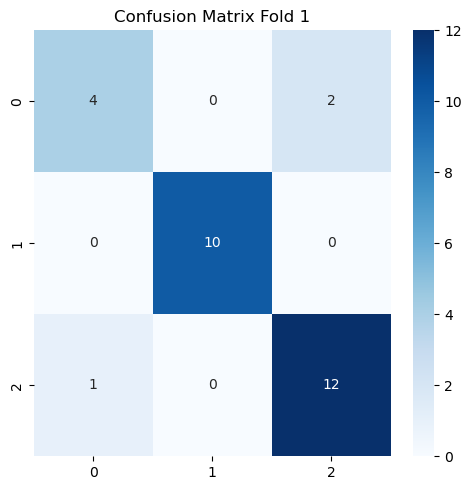

SVM Classification Report for Fold 1:
               precision    recall  f1-score   support

  Condition1       0.80      0.67      0.73         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.86      0.92      0.89        13

    accuracy                           0.90        29
   macro avg       0.89      0.86      0.87        29
weighted avg       0.89      0.90      0.89        29

Fold 2 - Training data length: 87 | Test data length: 29
Accuracy for fold 2: 0.93


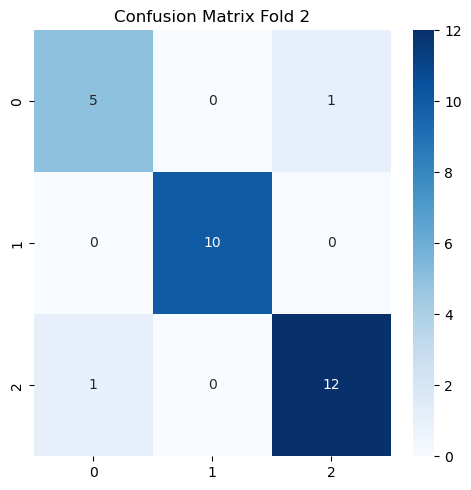

SVM Classification Report for Fold 2:
               precision    recall  f1-score   support

  Condition1       0.83      0.83      0.83         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      0.92      0.92        13

    accuracy                           0.93        29
   macro avg       0.92      0.92      0.92        29
weighted avg       0.93      0.93      0.93        29

Fold 3 - Training data length: 87 | Test data length: 29
Accuracy for fold 3: 1.0


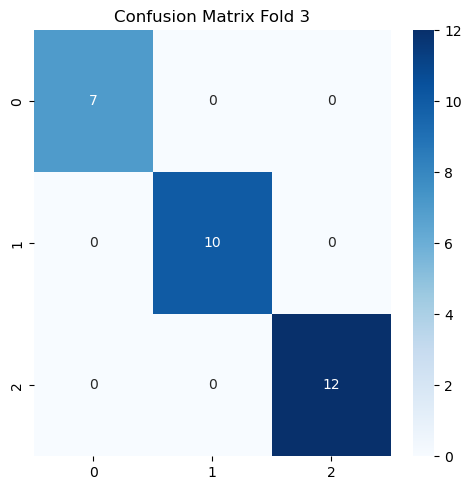

SVM Classification Report for Fold 3:
               precision    recall  f1-score   support

  Condition1       1.00      1.00      1.00         7
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Fold 4 - Training data length: 87 | Test data length: 29
Accuracy for fold 4: 0.97


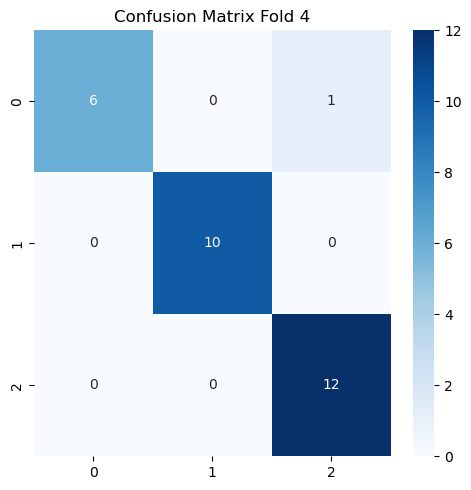

SVM Classification Report for Fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29

Mean accuracy over folds: 0.95


In [89]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score as acs, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the data from the CSV file (updated to use 'cleaneddata.csv')
data = pd.read_csv("cleaneddata.csv")

# Convert the 'Condition' column to categorical values (target)
data['Condition'] = data['Condition'].astype('category')

# Extract features (all columns except 'Condition') and target variable ('Condition')
X = data.drop(columns=['Condition'])  # Features: all columns except the target
y = data['Condition']                 # Target: 'Condition'

# Define SVC model (Support Vector Classifier)
model = SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0)

# SVM requires data scaling, so we use StandardScaler
scaler = StandardScaler()

# Split data into 4 stratified folds (for training and testing in cross-validation)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Accuracy list
accuracy_list = []
# Create directory to save confusion matrices
save_path = 'SVM_results'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Cross-validation loop
for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    # Train and test split
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Fold {fold_idx} - Training data length: {len(y_train)} | Test data length: {len(y_test)}")
    
    # Train the SVM model
    model.fit(X_train_scaled, y_train)
    
    # Predict the target for the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = acs(y_test, y_pred)
    print(f"Accuracy for fold {fold_idx}: {round(accuracy, 2)}")
    accuracy_list.append(accuracy)
    
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix Fold {fold_idx}')
    plt.tight_layout()
    
    # Save confusion matrix as image
    plt.savefig(os.path.join(save_path, f'confusion_matrix_fold_{fold_idx}.png'))
    
    # Display the confusion matrix inline
    plt.show()

    # Generate and display classification report
    print(f"SVM Classification Report for Fold {fold_idx}:\n", classification_report(y_test, y_pred))

# Print overall accuracy from cross-validation
print(f"Mean accuracy over folds: {np.mean(accuracy_list):.2f}") 


In [90]:
model.classes_

array(['Condition1', 'Condition3', 'Normal1'], dtype=object)

In [91]:
# Load the data from 'cleaneddata.csv'
data = pd.read_csv("cleaneddata.csv")

# Convert the 'Condition' column to categorical values (target)
data['Condition'] = data['Condition'].astype('category')

# Extract features (all columns except 'Condition') and target variable ('Condition')
X = data.drop(columns=['Condition'])  # Features: all columns except 'Condition'
y = data['Condition']                 # Target: 'Condition'

# Print data (feature) shape
print("Feature shape: ", X.shape)

Feature shape:  (116, 12)


Selected features: Index(['Switch-over volume', 'Material cushion'], dtype='object')
Fold 1:
Training data length: 87
Test data length: 29
Accuracy for fold 1: 0.79


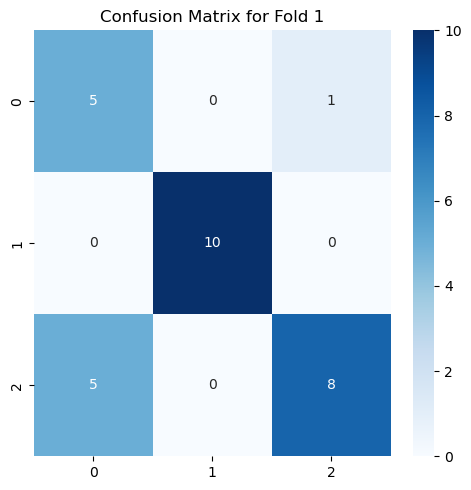

SVM classification report for fold 1:
               precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       1.00      1.00      1.00        10
           2       0.89      0.62      0.73        13

    accuracy                           0.79        29
   macro avg       0.80      0.82      0.78        29
weighted avg       0.85      0.79      0.80        29



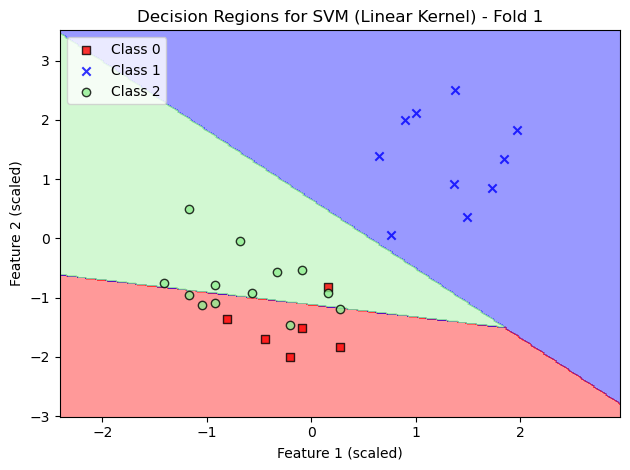

Fold 2:
Training data length: 87
Test data length: 29
Accuracy for fold 2: 0.9


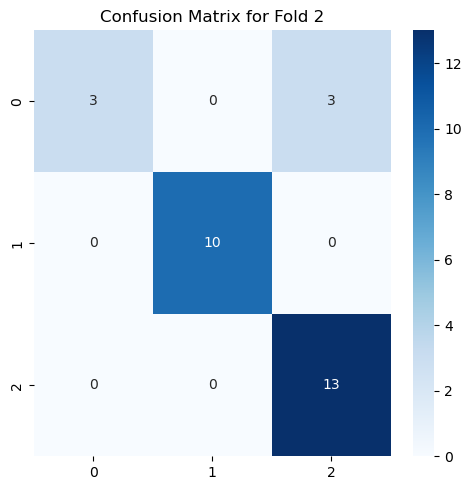

SVM classification report for fold 2:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00        10
           2       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.94      0.83      0.85        29
weighted avg       0.92      0.90      0.88        29



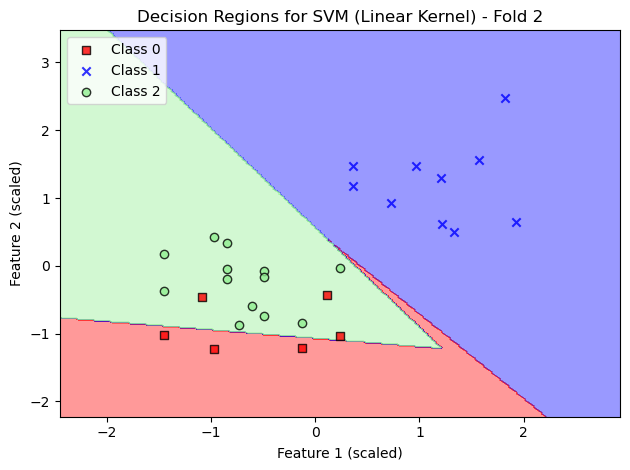

Fold 3:
Training data length: 87
Test data length: 29
Accuracy for fold 3: 0.79


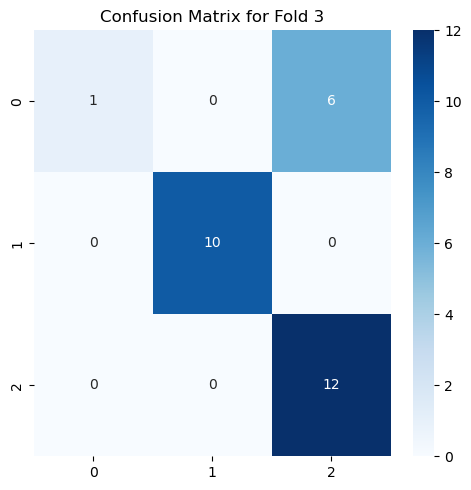

SVM classification report for fold 3:
               precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       1.00      1.00      1.00        10
           2       0.67      1.00      0.80        12

    accuracy                           0.79        29
   macro avg       0.89      0.71      0.68        29
weighted avg       0.86      0.79      0.74        29



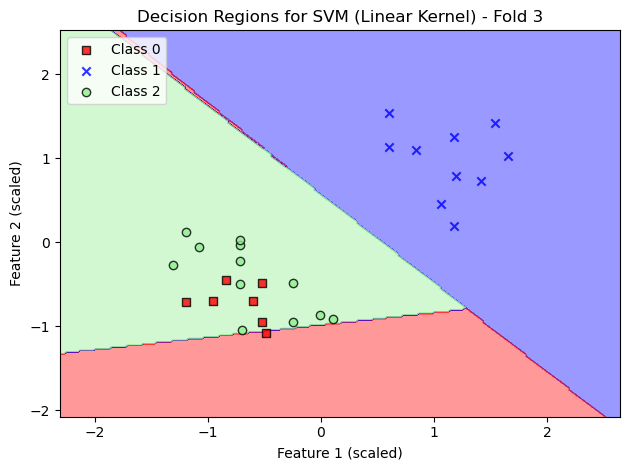

Fold 4:
Training data length: 87
Test data length: 29
Accuracy for fold 4: 0.86


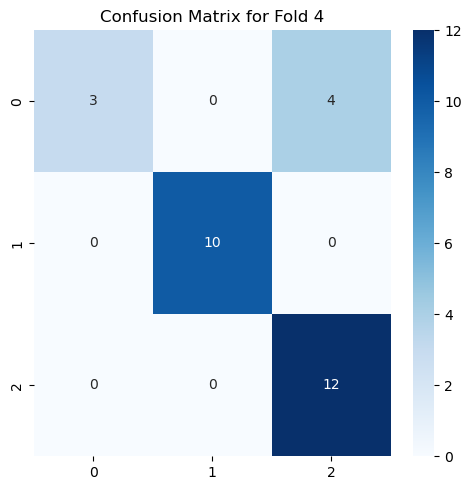

SVM classification report for fold 4:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       1.00      1.00      1.00        10
           2       0.75      1.00      0.86        12

    accuracy                           0.86        29
   macro avg       0.92      0.81      0.82        29
weighted avg       0.90      0.86      0.84        29



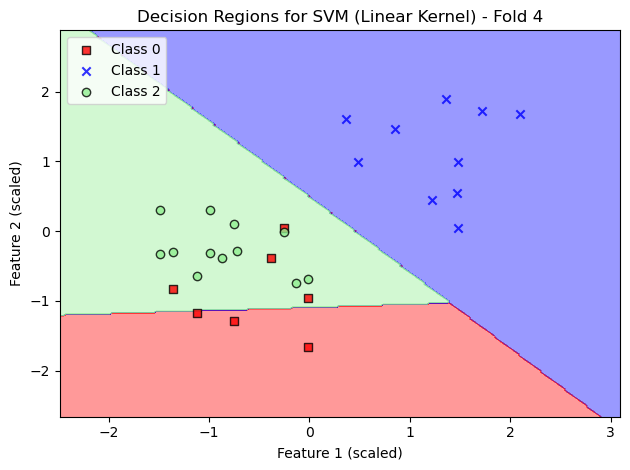

Total training samples across all folds: 348
Total testing samples across all folds: 116
Mean accuracy across all folds: 0.8362


In [135]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.metrics import confusion_matrix, accuracy_score as acs, classification_report
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the cleaneddata.csv dataset
data = pd.read_csv("cleaneddata.csv")

# Extract all features and target variable
X = data.drop(columns=['Condition'])  # All features (12 parameters)
y = data['Condition']                 # Target: 'Condition' column

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define SVC model with linear kernel
model = SVC(kernel='linear')

# Use RFE to select the 2 most important features
rfe = RFE(estimator=model, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, y_encoded)

# Get the selected feature names
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

# SVM requires scaling the data
scaler = StandardScaler()

# Stratified K-Folds cross-validator (4 folds)
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Lists to store results
accuracy_l = []

# Variables to accumulate the total number of training and testing samples
total_train_samples = 0
total_test_samples = 0

# Decision region plotting function
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=f"Class {cl}", edgecolor='black')

# Cross-validation loop
for fold, (tr_i, te_i) in enumerate(cv.split(X_rfe, y_encoded), 1):
    # Train and test split
    X_train = X_rfe[tr_i]
    X_test = X_rfe[te_i]
    y_train = y_encoded[tr_i]
    y_test = y_encoded[te_i]
    
    # Update total number of training and testing samples
    total_train_samples += len(y_train)
    total_test_samples += len(y_test)
    
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Fold {fold}:")
    print("Training data length:", len(y_train))
    print("Test data length:", len(y_test))
    
    # Fit the SVM model
    model.fit(X_train_scaled, y_train)
    
    # Predict the target for the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = acs(y_test, y_pred)
    print(f"Accuracy for fold {fold}: {round(accuracy, 2)}")
    accuracy_l.append(accuracy)
    
    # Use confusion matrix to compare y_test and y_pred, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.title(f"Confusion Matrix for Fold {fold}")
    plt.tight_layout()
    plt.show()
    
    # Generate classification report
    print(f"SVM classification report for fold {fold}:\n", classification_report(y_test, y_pred))
    
    # Plot decision regions for the test set
    plot_decision_regions(X_test_scaled, y_test, classifier=model)
    plt.title(f"Decision Regions for SVM (Linear Kernel) - Fold {fold}")
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Print the total number of training and testing samples
print(f"Total training samples across all folds: {total_train_samples}")
print(f"Total testing samples across all folds: {total_test_samples}")

# Print mean accuracy across all folds
mean_accuracy = np.mean(accuracy_l)
print(f"Mean accuracy across all folds: {mean_accuracy:.4f}")


Selected features: Index(['Switch-over volume', 'Material cushion'], dtype='object')
Fold 1:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[5 0 1]
 [0 9 1]
 [4 0 9]]


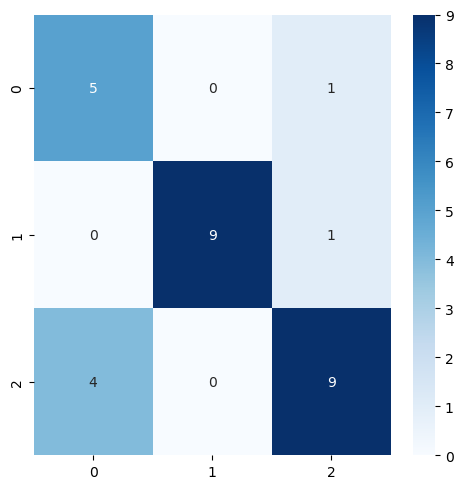

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       1.00      0.90      0.95        10
           2       0.82      0.69      0.75        13

    accuracy                           0.79        29
   macro avg       0.79      0.81      0.79        29
weighted avg       0.83      0.79      0.80        29



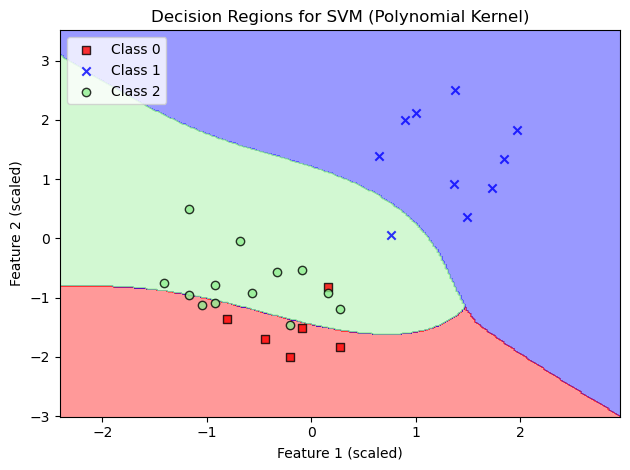

Fold 2:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 3  0  3]
 [ 0 10  0]
 [ 0  0 13]]


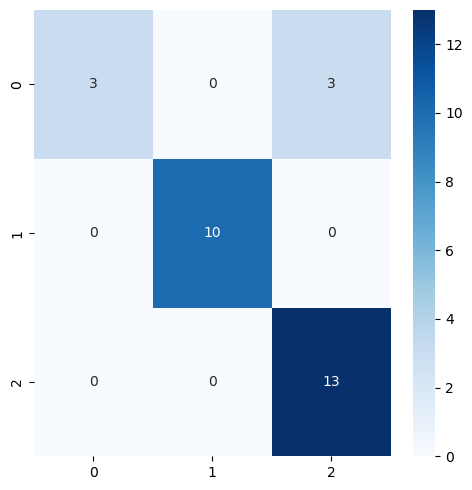

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00        10
           2       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.94      0.83      0.85        29
weighted avg       0.92      0.90      0.88        29



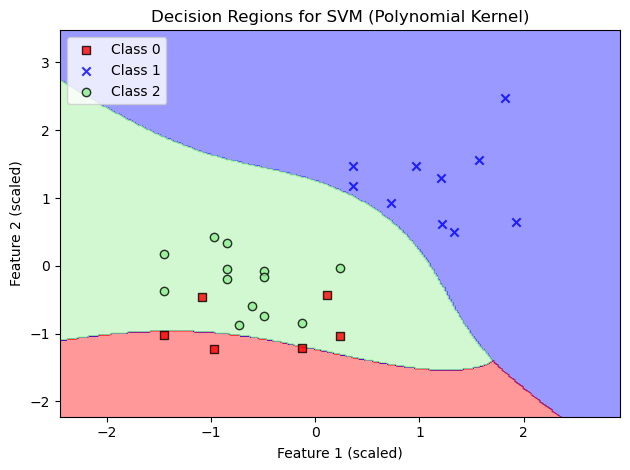

Fold 3:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 0  0  7]
 [ 0 10  0]
 [ 1  0 11]]


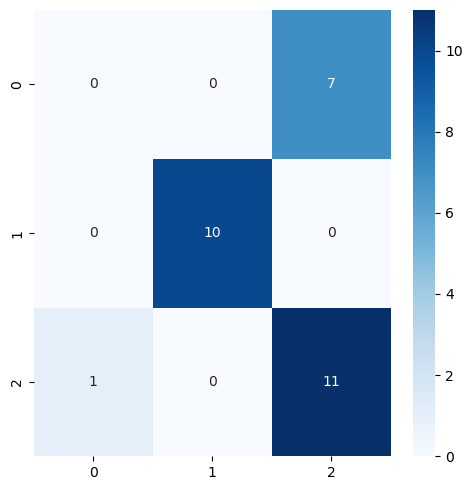

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      1.00      1.00        10
           2       0.61      0.92      0.73        12

    accuracy                           0.72        29
   macro avg       0.54      0.64      0.58        29
weighted avg       0.60      0.72      0.65        29



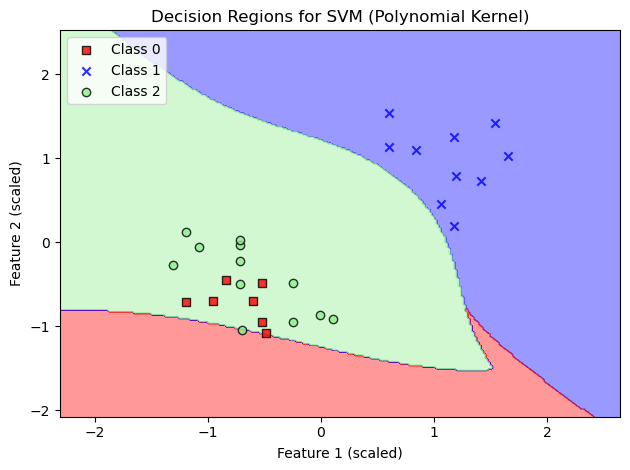

Fold 4:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 3  0  4]
 [ 0 10  0]
 [ 0  0 12]]


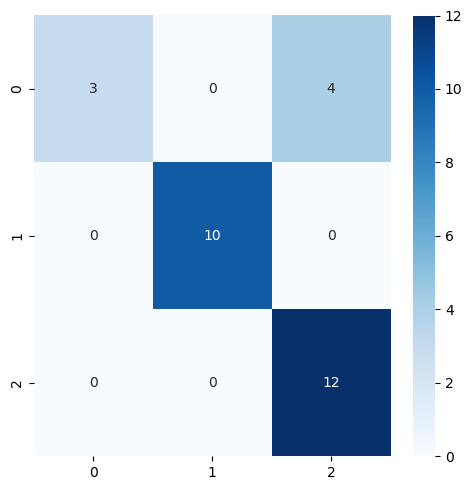

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       1.00      1.00      1.00        10
           2       0.75      1.00      0.86        12

    accuracy                           0.86        29
   macro avg       0.92      0.81      0.82        29
weighted avg       0.90      0.86      0.84        29



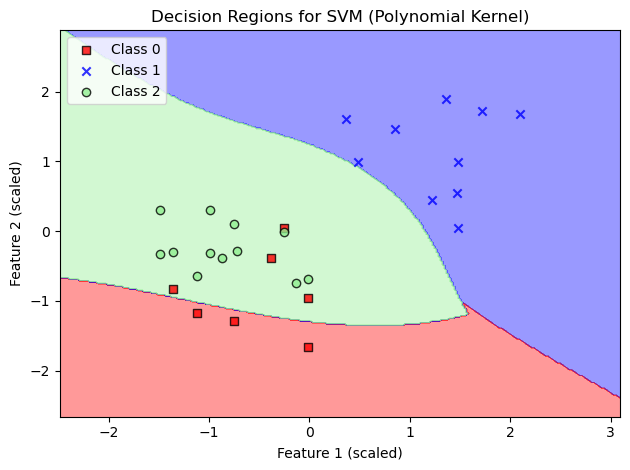

Total training samples across all folds: 348
Total testing samples across all folds: 116
Mean accuracy for Polynomial kernel: 0.8190


In [137]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score as acs, classification_report
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the cleaneddata.csv dataset
data = pd.read_csv("cleaneddata.csv")

# Extract all features and target variable
X = data.drop(columns=['Condition'])  # All features (12 parameters)
y = data['Condition']                 # Target: 'Condition' column

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define SVC model for feature selection
svc_for_selection = SVC(kernel='linear', random_state=0)

# Use RFE to select the 2 most important features
rfe = RFE(estimator=svc_for_selection, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, y_encoded)

# Get the selected feature names
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

# Define SVC model with polynomial kernel
model_poly = SVC(kernel='poly', degree=3, random_state=0)

# SVM requires scaling the data
scaler = StandardScaler()

# Stratified K-Folds cross-validator (4 folds)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Lists to store results for Polynomial kernel
accuracy_poly = []

# Variables to accumulate the total number of training and testing samples
total_train_samples = 0
total_test_samples = 0

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=f"Class {cl}", edgecolor='black')

# Cross-validation loop for Polynomial kernel
for fold, (tr_i, te_i) in enumerate(cv.split(X_rfe, y_encoded), 1):
    # Train and test split
    X_train = X_rfe[tr_i]
    X_test = X_rfe[te_i]
    y_train = y_encoded[tr_i]
    y_test = y_encoded[te_i]
    
    # Update total number of training and testing samples
    total_train_samples += len(y_train)
    total_test_samples += len(y_test)
    
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Fold {fold}:")
    print("Training data length:", len(y_train))
    print("Test data length:", len(y_test))
    
    # Fit the SVM model with polynomial kernel
    model_poly.fit(X_train_scaled, y_train)
    
    # Predict the target for the test set
    y_pred = model_poly.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = acs(y_test, y_pred)
    accuracy_poly.append(accuracy)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    
    # Plot confusion matrix as heatmap
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Visualize decision regions
    plot_decision_regions(X_test_scaled, y_test, classifier=model_poly)
    plt.title('Decision Regions for SVM (Polynomial Kernel)')
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Print total number of training and testing samples across all folds
print(f"Total training samples across all folds: {total_train_samples}")
print(f"Total testing samples across all folds: {total_test_samples}")

# Print mean accuracy for Polynomial kernel
print("Mean accuracy for Polynomial kernel: {:.4f}".format(np.mean(accuracy_poly)))


Selected features: Index(['Switch-over volume', 'Material cushion'], dtype='object')
Fold 1:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 4  0  2]
 [ 0 10  0]
 [ 1  0 12]]


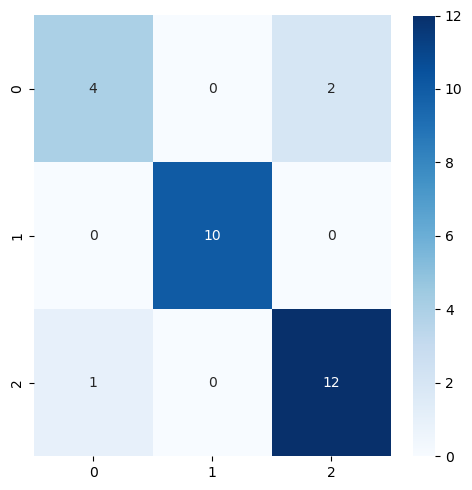

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       1.00      1.00      1.00        10
           2       0.86      0.92      0.89        13

    accuracy                           0.90        29
   macro avg       0.89      0.86      0.87        29
weighted avg       0.89      0.90      0.89        29



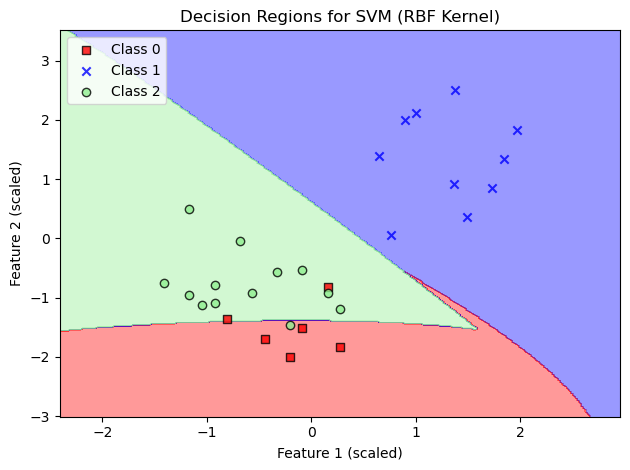

Fold 2:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 0  0  6]
 [ 0 10  0]
 [ 0  0 13]]


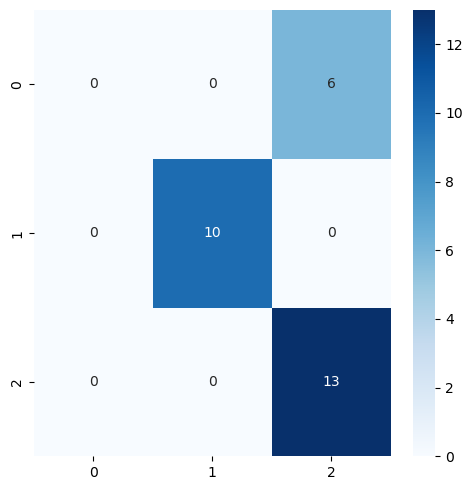

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      1.00      1.00        10
           2       0.68      1.00      0.81        13

    accuracy                           0.79        29
   macro avg       0.56      0.67      0.60        29
weighted avg       0.65      0.79      0.71        29



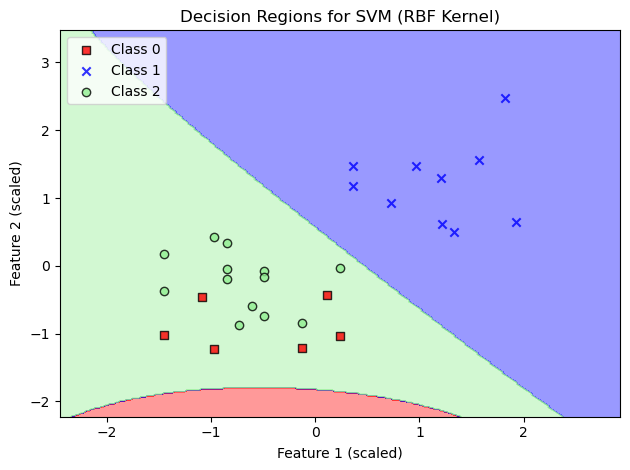

Fold 3:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 0  0  7]
 [ 0 10  0]
 [ 0  0 12]]


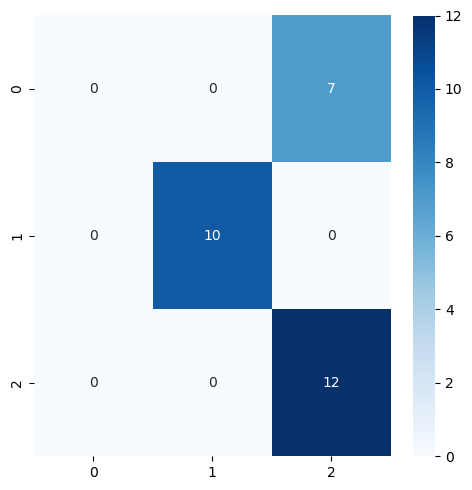

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      1.00      1.00        10
           2       0.63      1.00      0.77        12

    accuracy                           0.76        29
   macro avg       0.54      0.67      0.59        29
weighted avg       0.61      0.76      0.67        29



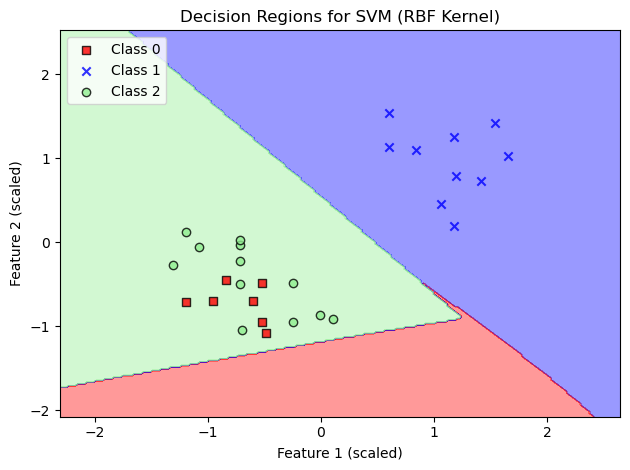

Fold 4:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 0  0  7]
 [ 0 10  0]
 [ 0  0 12]]


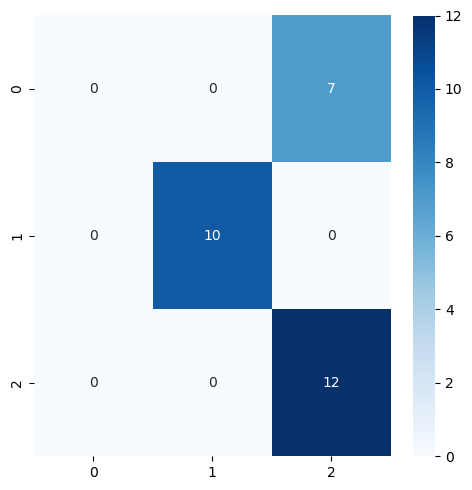

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      1.00      1.00        10
           2       0.63      1.00      0.77        12

    accuracy                           0.76        29
   macro avg       0.54      0.67      0.59        29
weighted avg       0.61      0.76      0.67        29



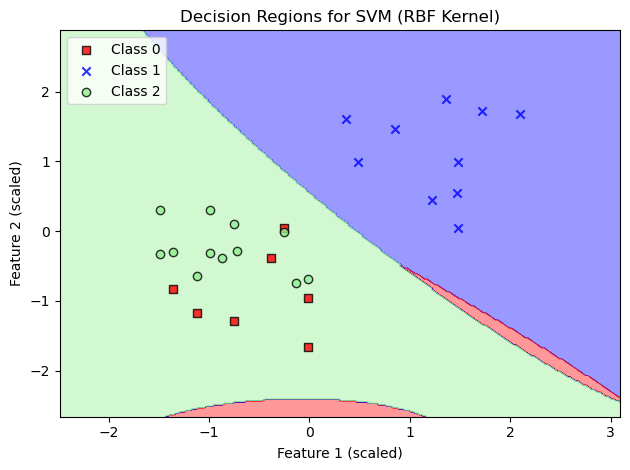

Total training samples across all folds: 348
Total testing samples across all folds: 116
Mean accuracy for RBF kernel: 0.8017


In [139]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score as acs, classification_report
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the cleaneddata.csv dataset
data = pd.read_csv("cleaneddata.csv")

# Extract all features and target variable
X = data.drop(columns=['Condition'])  # All features (12 parameters)
y = data['Condition']                 # Target: 'Condition' column

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define SVC model for feature selection (use linear kernel for RFE)
svc_for_selection = SVC(kernel='linear', random_state=0)

# Use RFE to select the 2 most important features
rfe = RFE(estimator=svc_for_selection, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, y_encoded)

# Get the selected feature names
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

# Define SVC model with RBF kernel
model_rbf = SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0)

# SVM requires scaling the data
scaler = StandardScaler()

# Stratified K-Folds cross-validator (4 folds)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Lists to store results for RBF kernel
accuracy_rbf = []

# Variables to accumulate the total number of training and testing samples
total_train_samples = 0
total_test_samples = 0

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=f"Class {cl}", edgecolor='black')

# Cross-validation loop for RBF kernel
for fold, (tr_i, te_i) in enumerate(cv.split(X_rfe, y_encoded), 1):
    # Train and test split
    X_train = X_rfe[tr_i]
    X_test = X_rfe[te_i]
    y_train = y_encoded[tr_i]
    y_test = y_encoded[te_i]
    
    # Update total number of training and testing samples
    total_train_samples += len(y_train)
    total_test_samples += len(y_test)
    
    print(f"Fold {fold}:")
    print("Training data length:", len(y_train))
    print("Test data length:", len(y_test))
    
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit the SVM model with RBF kernel
    model_rbf.fit(X_train_scaled, y_train)
    
    # Predict the target for the test set
    y_pred = model_rbf.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = acs(y_test, y_pred)
    accuracy_rbf.append(accuracy)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    
    # Plot confusion matrix as heatmap
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Visualize decision regions
    plot_decision_regions(X_test_scaled, y_test, classifier=model_rbf)
    plt.title('Decision Regions for SVM (RBF Kernel)')
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Print total number of training and testing samples across all folds
print(f"Total training samples across all folds: {total_train_samples}")
print(f"Total testing samples across all folds: {total_test_samples}")

# Print mean accuracy for RBF kernel
print("Mean accuracy for RBF kernel: {:.4f}".format(np.mean(accuracy_rbf)))


Selected features: Index(['Maximum injection pressure', 'Switch-over volume'], dtype='object')
Fold 1:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 5  0  1]
 [ 0 10  0]
 [ 4  0  9]]


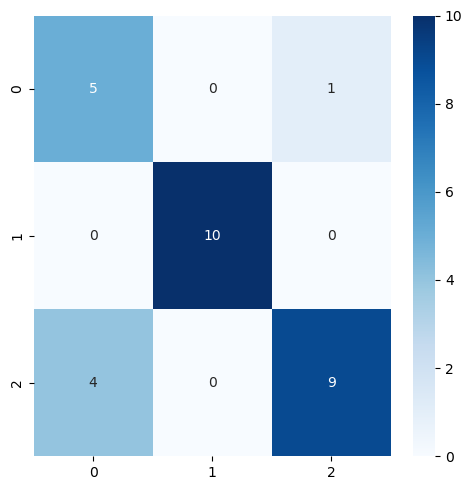

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       1.00      1.00      1.00        10
           2       0.90      0.69      0.78        13

    accuracy                           0.83        29
   macro avg       0.82      0.84      0.82        29
weighted avg       0.86      0.83      0.83        29



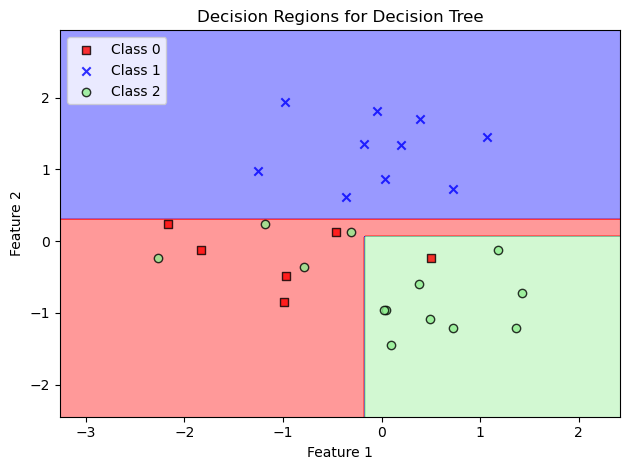

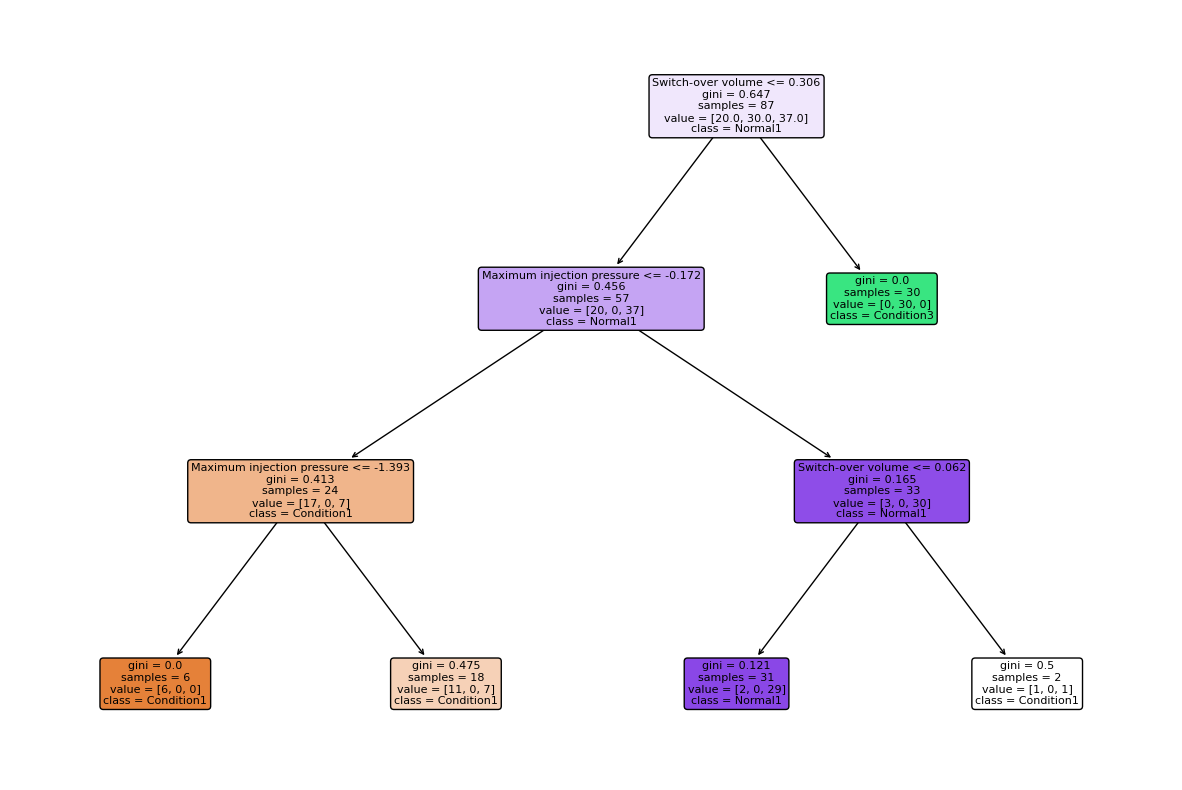

Fold 2:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 4  0  2]
 [ 0 10  0]
 [ 3  0 10]]


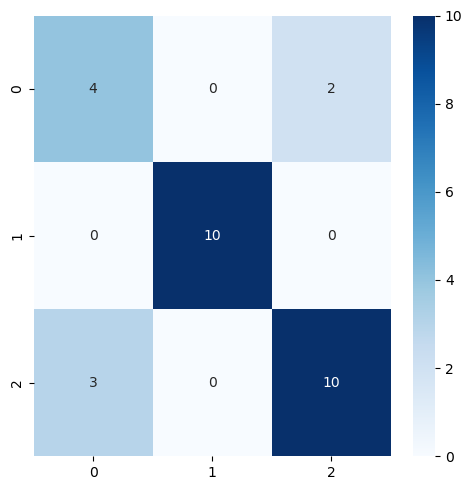

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       1.00      1.00      1.00        10
           2       0.83      0.77      0.80        13

    accuracy                           0.83        29
   macro avg       0.80      0.81      0.81        29
weighted avg       0.84      0.83      0.83        29



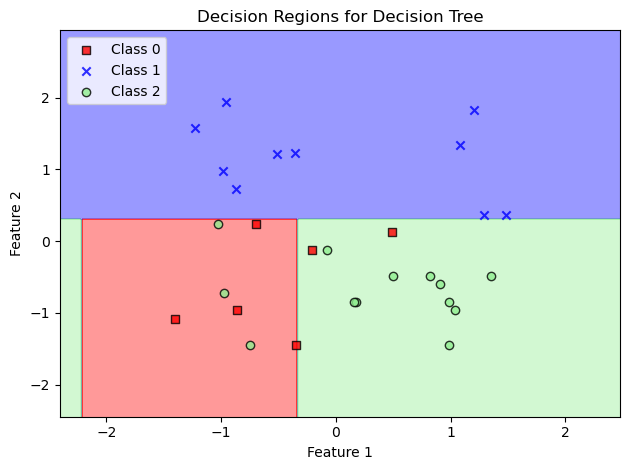

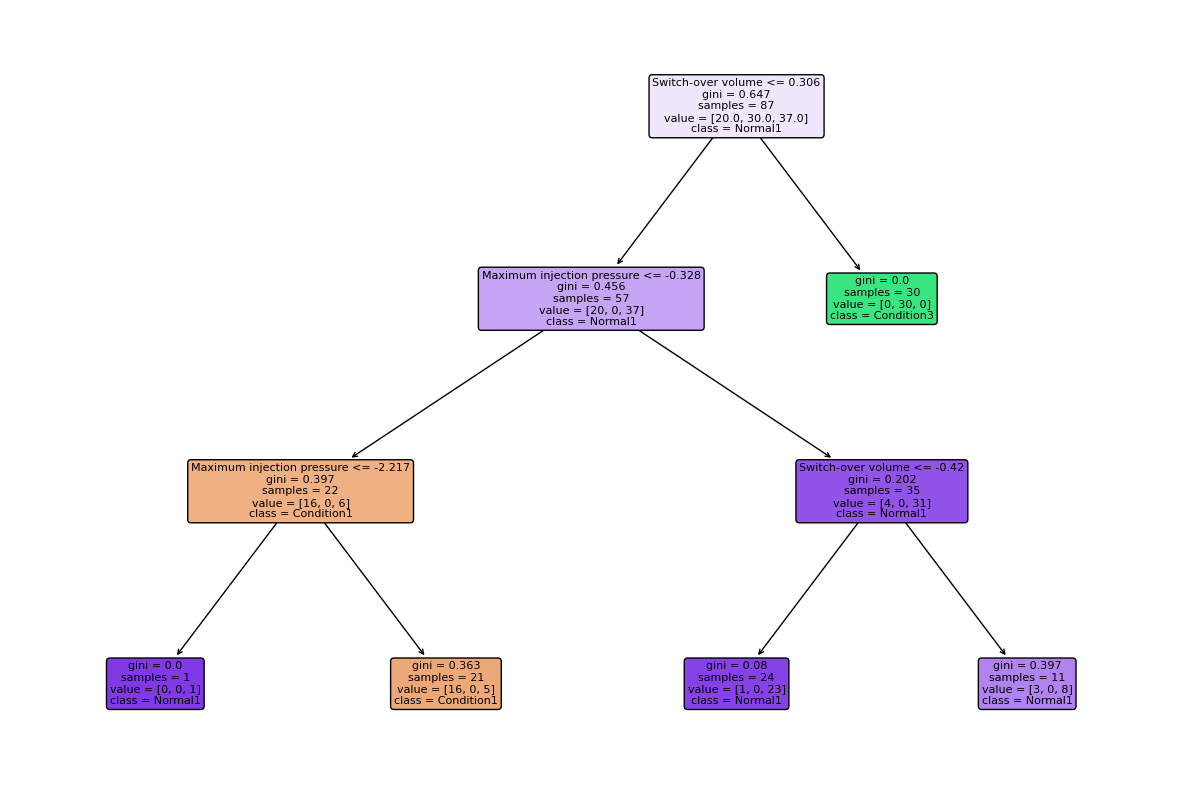

Fold 3:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 7  0  0]
 [ 0 10  0]
 [ 4  0  8]]


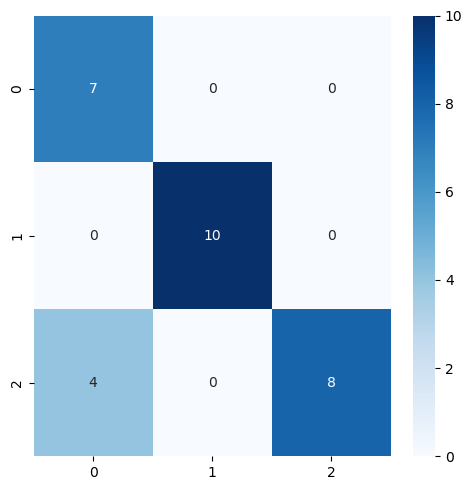

Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      1.00      1.00        10
           2       1.00      0.67      0.80        12

    accuracy                           0.86        29
   macro avg       0.88      0.89      0.86        29
weighted avg       0.91      0.86      0.86        29



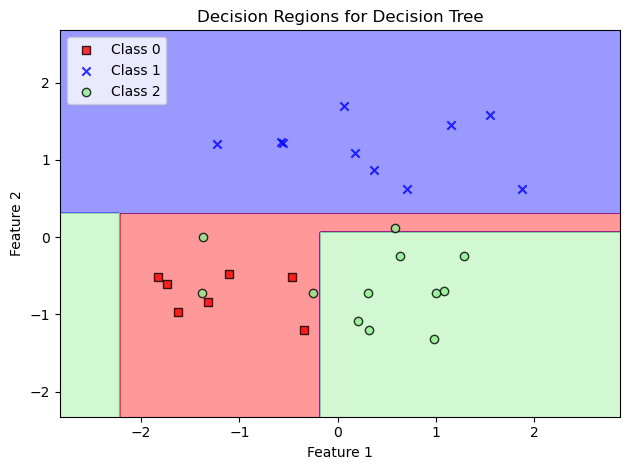

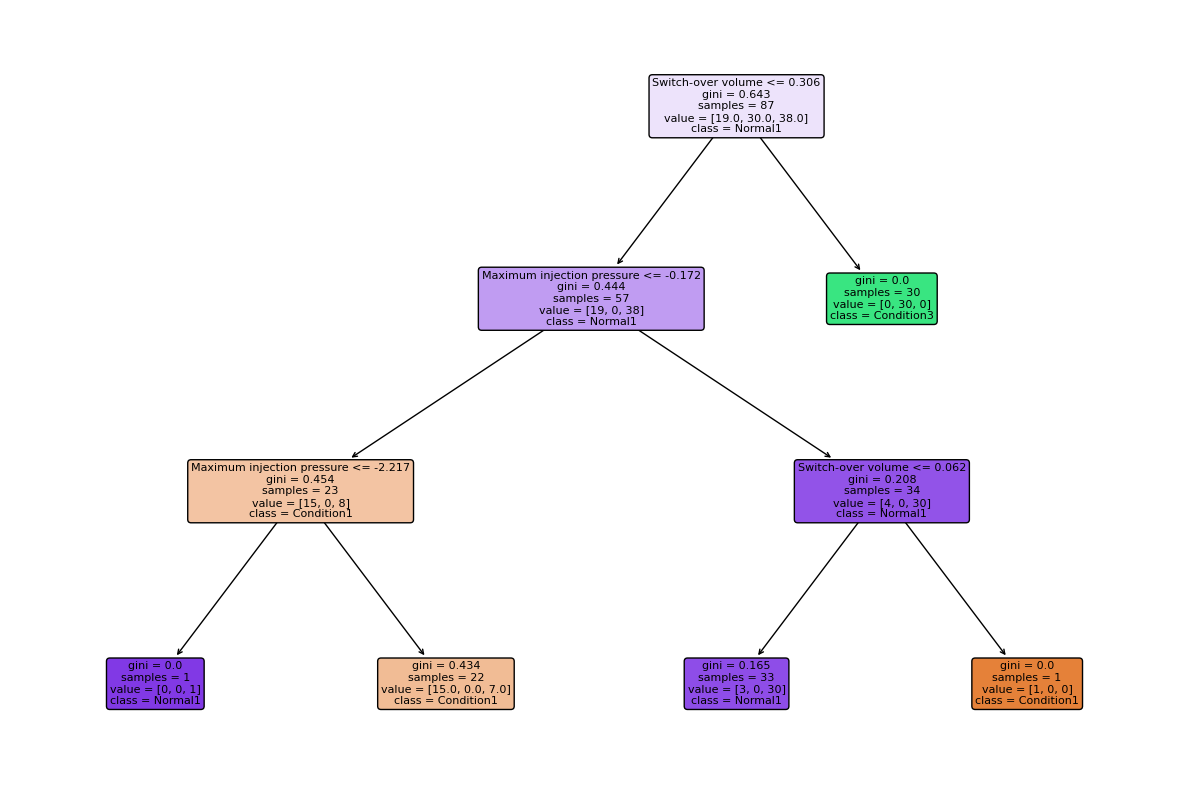

Fold 4:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 2  0  5]
 [ 0 10  0]
 [ 1  0 11]]


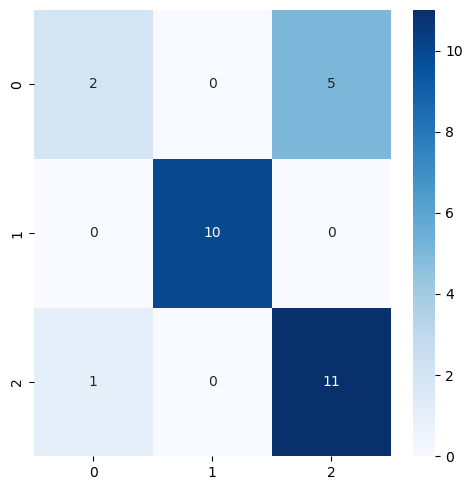

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       1.00      1.00      1.00        10
           2       0.69      0.92      0.79        12

    accuracy                           0.79        29
   macro avg       0.78      0.73      0.73        29
weighted avg       0.79      0.79      0.77        29



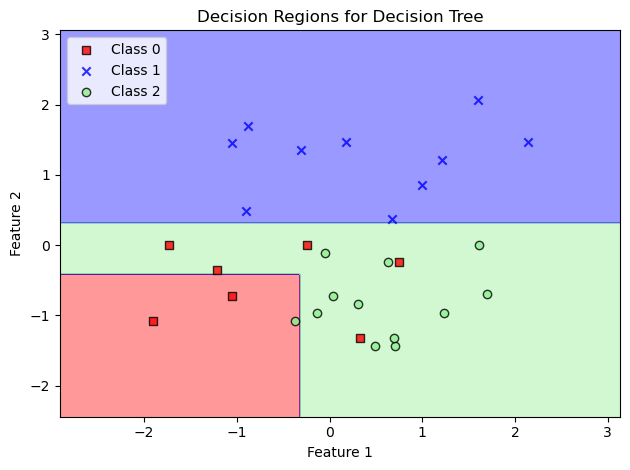

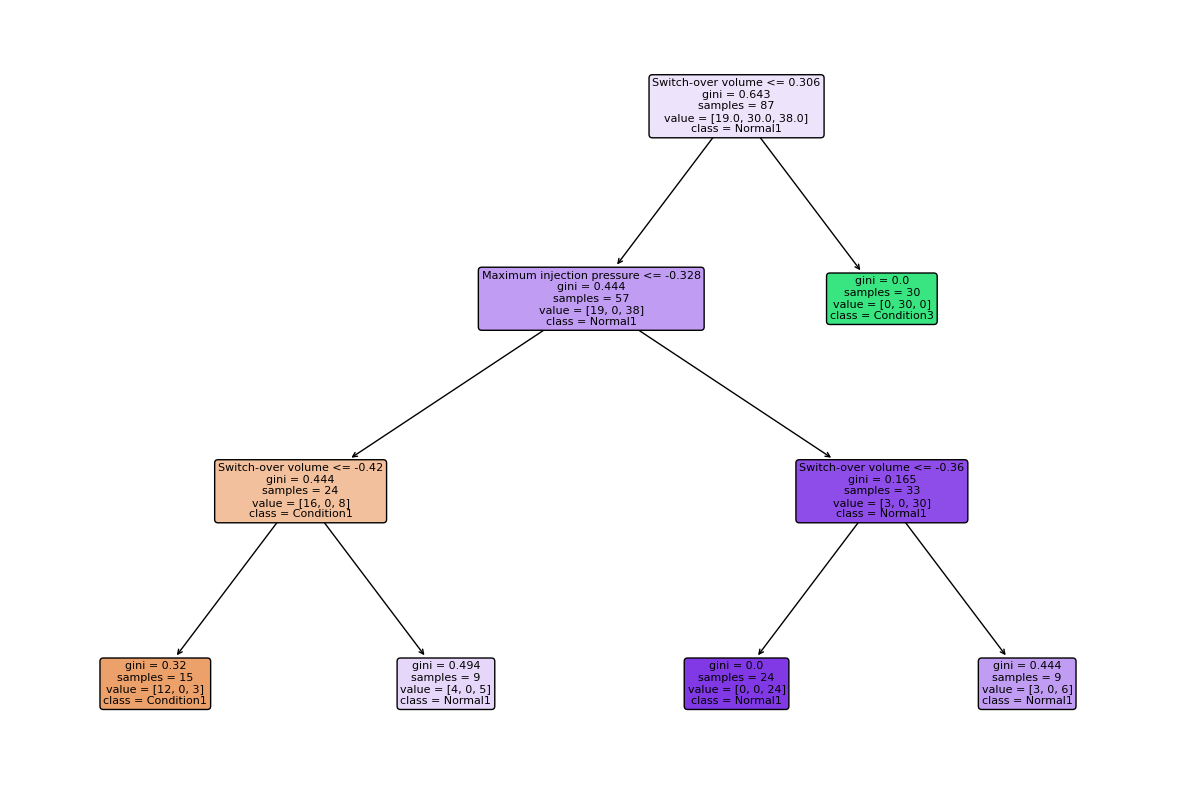

Total training samples across all folds: 348
Total testing samples across all folds: 116
Mean accuracy for Decision Tree: 0.8276


In [141]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score as acs, classification_report
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the cleaneddata.csv dataset
data = pd.read_csv("cleaneddata.csv")

# Extract all features and target variable
X = data.drop(columns=['Condition'])  # All features (12 parameters)
y = data['Condition']                 # Target: 'Condition' column

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define Decision Tree model for feature selection
tree_for_selection = DecisionTreeClassifier(random_state=0)

# Standardize the data before applying RFE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use RFE to select the 2 most important features
rfe = RFE(estimator=tree_for_selection, n_features_to_select=2)
X_rfe = rfe.fit_transform(X_scaled, y_encoded)

# Get the selected feature names
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

# Define Decision Tree model for training and evaluation
# Limit the max depth to prevent overfitting and make the tree more readable
model_tree = DecisionTreeClassifier(random_state=0, max_depth=3)

# Stratified K-Folds cross-validator (4 folds)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Lists to store results for Decision Tree
accuracy_tree = []

# Variables to accumulate the total number of training and testing samples
total_train_samples = 0
total_test_samples = 0

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=f"Class {cl}", edgecolor='black')

# Cross-validation loop for Decision Tree
for fold, (tr_i, te_i) in enumerate(cv.split(X_rfe, y_encoded), 1):
    # Train and test split
    X_train = X_rfe[tr_i]
    X_test = X_rfe[te_i]
    y_train = y_encoded[tr_i]
    y_test = y_encoded[te_i]
    
    # Update total number of training and testing samples
    total_train_samples += len(y_train)
    total_test_samples += len(y_test)
    
    print(f"Fold {fold}:")
    print("Training data length:", len(y_train))
    print("Test data length:", len(y_test))
    
    # Fit the Decision Tree model
    model_tree.fit(X_train, y_train)
    
    # Predict the target for the test set
    y_pred = model_tree.predict(X_test)
    
    # Calculate accuracy
    accuracy = acs(y_test, y_pred)
    accuracy_tree.append(accuracy)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    
    # Plot confusion matrix as heatmap
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Visualize decision regions
    plot_decision_regions(X_test, y_test, classifier=model_tree)
    plt.title('Decision Regions for Decision Tree')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    # Plot the decision tree structure using matplotlib
    plt.figure(figsize=(15, 10))  # Increase the figure size for better readability

    # Use the original 'Condition' labels instead of numeric encoding
    condition_labels = le.inverse_transform(model_tree.classes_)

    # Plot the tree with smaller fontsize and bigger figure
    plot_tree(model_tree, 
              feature_names=selected_features,  # Use the selected features
              class_names=condition_labels,  # Use the original class names
              filled=True, rounded=True, 
              fontsize=8)  # Adjust the fontsize to make the tree readable
    plt.show()

# Print total number of training and testing samples across all folds
print(f"Total training samples across all folds: {total_train_samples}")
print(f"Total testing samples across all folds: {total_test_samples}")

# Print mean accuracy for Decision Tree
print("Mean accuracy for Decision Tree: {:.4f}".format(np.mean(accuracy_tree)))


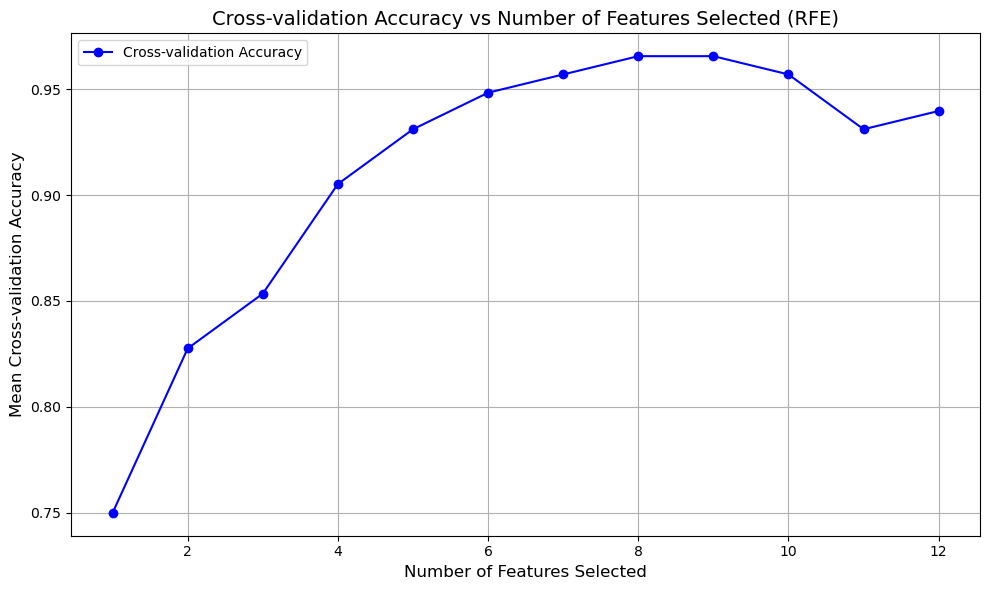

Best number of features for highest cross-validation accuracy: 8
Selected features for 8 features: Index(['Cylinder heating zone 1', 'Cylinder heating zone 3',
       'Cylinder heating zone 4', 'Cylinder heating zone 5',
       'Maximum injection pressure', 'Cycle time', 'Switch-over volume',
       'Material cushion'],
      dtype='object')


In [143]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the cleaneddata.csv dataset
data = pd.read_csv("cleaneddata.csv")

# Extract all features and target variable
X = data.drop(columns=['Condition'])  # All features (12 parameters)
y = data['Condition']                 # Target: 'Condition' column

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the data (important for SVMs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SVM model (Linear SVM)
svm_model = SVC(kernel='linear', random_state=0)

# Stratified K-Folds cross-validation (4 folds)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Initialize lists to store results for each number of features selected
cross_val_accuracies = []
selected_features_list = []

# Perform RFE with varying numbers of features
for num_features in range(1, X_scaled.shape[1] + 1):
    # Define RFE for feature selection with SVM
    rfe = RFE(estimator=svm_model, n_features_to_select=num_features)
    X_rfe = rfe.fit_transform(X_scaled, y_encoded)

    # Get the selected feature names for the current number of features
    selected_features = X.columns[rfe.support_]
    selected_features_list.append(selected_features)

    # Perform cross-validation with the selected features
    cv_scores = cross_val_score(svm_model, X_rfe, y_encoded, cv=cv, scoring='accuracy')
    
    # Append the mean cross-validation score for the current number of features
    cross_val_accuracies.append(np.mean(cv_scores))

# Plot cross-validation accuracy vs number of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_scaled.shape[1] + 1), cross_val_accuracies, marker='o', color='b', linestyle='-', label='Cross-validation Accuracy')
plt.title('Cross-validation Accuracy vs Number of Features Selected (RFE)', fontsize=14)
plt.xlabel('Number of Features Selected', fontsize=12)
plt.ylabel('Mean Cross-validation Accuracy', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Optionally, print the best number of features for cross-validation
best_num_features = np.argmax(cross_val_accuracies) + 1
print(f"Best number of features for highest cross-validation accuracy: {best_num_features}")

# Print the selected features corresponding to the best number of features
print(f"Selected features for {best_num_features} features: {selected_features_list[best_num_features - 1]}")


Fold 1:
Accuracy: 0.9310
Confusion Matrix:
[[ 4  0  2]
 [ 0 10  0]
 [ 0  0 13]]


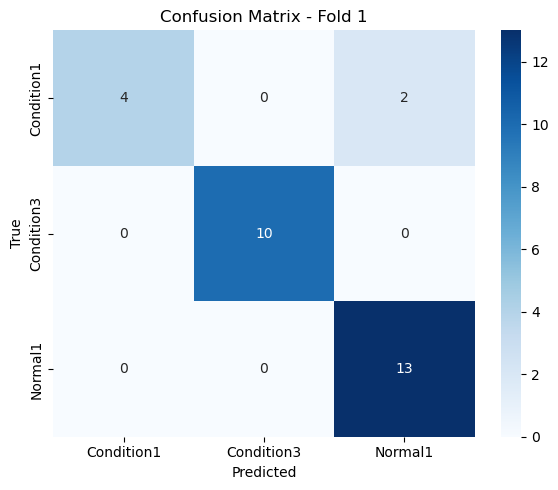

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.67      0.80         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.87      1.00      0.93        13

    accuracy                           0.93        29
   macro avg       0.96      0.89      0.91        29
weighted avg       0.94      0.93      0.93        29

Fold 2:
Accuracy: 0.9655
Confusion Matrix:
[[ 6  0  0]
 [ 0 10  0]
 [ 1  0 12]]


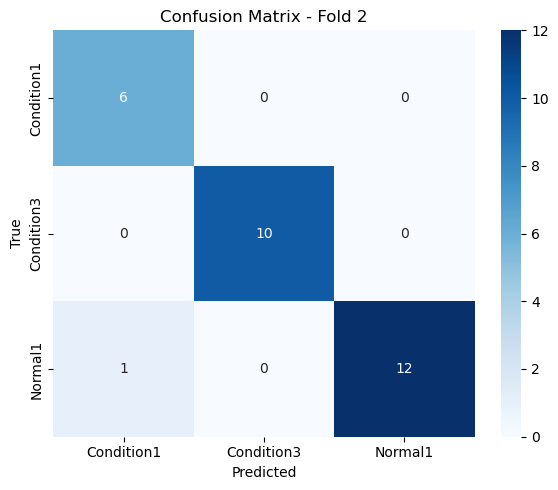

Classification Report:
              precision    recall  f1-score   support

  Condition1       0.86      1.00      0.92         6
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      0.92      0.96        13

    accuracy                           0.97        29
   macro avg       0.95      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29

Fold 3:
Accuracy: 1.0000
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  0]
 [ 0  0 12]]


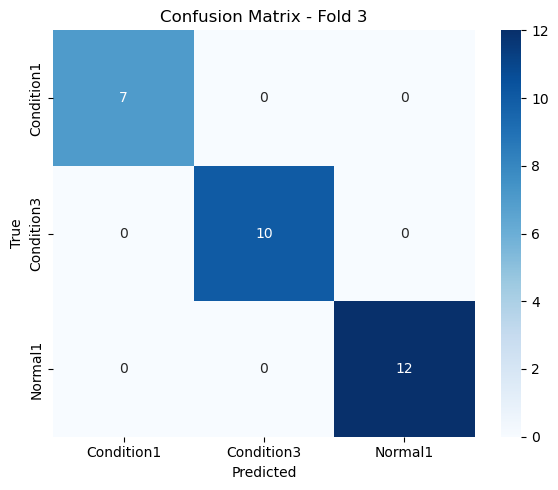

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      1.00      1.00         7
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Fold 4:
Accuracy: 0.9655
Confusion Matrix:
[[ 6  0  1]
 [ 0 10  0]
 [ 0  0 12]]


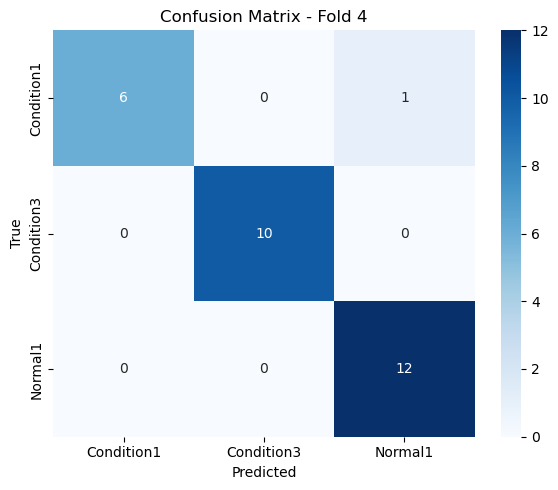

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29

Mean accuracy across all folds: 0.9655


In [151]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the cleaneddata.csv dataset
data = pd.read_csv("cleaneddata.csv")

# Extract all features and target variable
X = data[['Cylinder heating zone 1', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Cylinder heating zone 5',
          'Maximum injection pressure', 'Cycle time', 'Switch-over volume', 'Material cushion']]  # Selected features
y = data['Condition']  # Target: 'Condition' column

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the data (important for SVMs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SVM model (Linear SVM)
svm_model = SVC(kernel='linear', random_state=0)

# Stratified K-Folds cross-validation (4 folds)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Initialize lists to store results for each fold
accuracy_scores = []
confusion_matrices = []

# Cross-validation loop for training and testing the model
for fold, (train_index, test_index) in enumerate(cv.split(X_scaled, y_encoded), 1):
    # Split the data into training and testing sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the model
    svm_model.fit(X_train, y_train)
    
    # Predict the target for the test set
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy for the fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Print fold results
    print(f"Fold {fold}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean accuracy across all folds: {mean_accuracy:.4f}")


Fold 1:
Accuracy: 0.8276
Confusion Matrix:
[[ 3  0  3]
 [ 0  9  1]
 [ 1  0 12]]


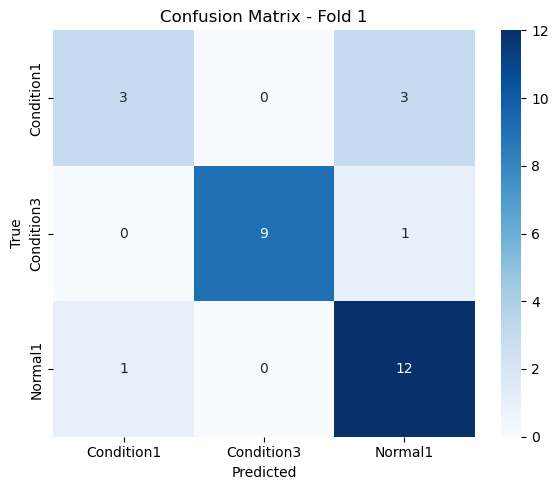

Classification Report:
              precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      0.90      0.95        10
     Normal1       0.75      0.92      0.83        13

    accuracy                           0.83        29
   macro avg       0.83      0.77      0.79        29
weighted avg       0.84      0.83      0.82        29

Fold 2:
Accuracy: 0.8621
Confusion Matrix:
[[ 2  0  4]
 [ 0 10  0]
 [ 0  0 13]]


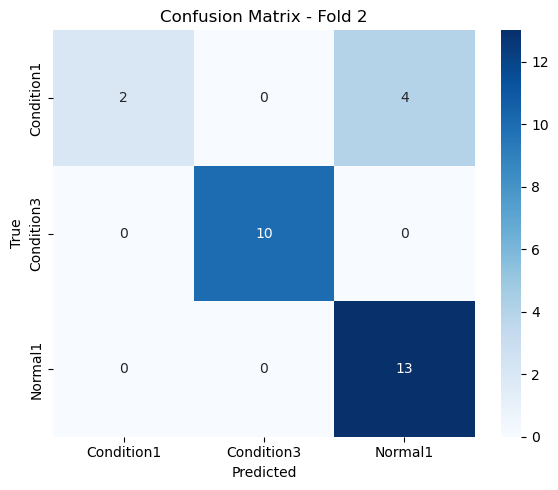

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.33      0.50         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.76      1.00      0.87        13

    accuracy                           0.86        29
   macro avg       0.92      0.78      0.79        29
weighted avg       0.89      0.86      0.84        29

Fold 3:
Accuracy: 0.9310
Confusion Matrix:
[[ 6  0  1]
 [ 0  9  1]
 [ 0  0 12]]


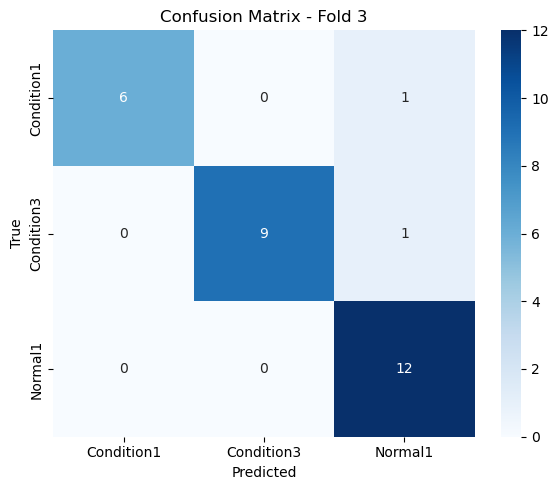

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      0.90      0.95        10
     Normal1       0.86      1.00      0.92        12

    accuracy                           0.93        29
   macro avg       0.95      0.92      0.93        29
weighted avg       0.94      0.93      0.93        29

Fold 4:
Accuracy: 0.8966
Confusion Matrix:
[[ 4  0  3]
 [ 0 10  0]
 [ 0  0 12]]


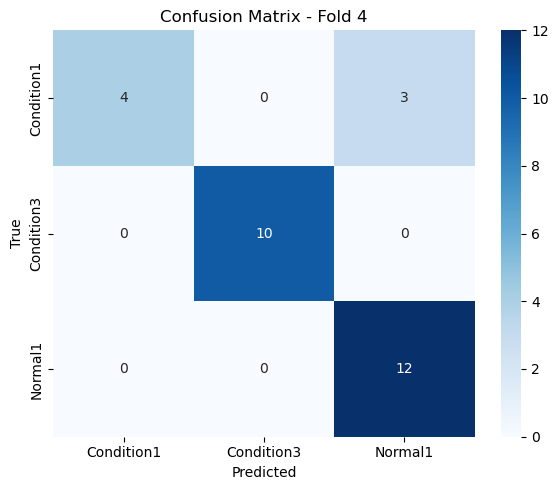

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.57      0.73         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      1.00      0.89        12

    accuracy                           0.90        29
   macro avg       0.93      0.86      0.87        29
weighted avg       0.92      0.90      0.89        29

Mean accuracy across all folds: 0.8793


In [159]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the cleaneddata.csv dataset
data = pd.read_csv("cleaneddata.csv")

# Extract the selected features and target variable
X = data[['Cylinder heating zone 1', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Cylinder heating zone 5',
          'Maximum injection pressure', 'Cycle time', 'Switch-over volume', 'Material cushion']]  # Selected features
y = data['Condition']  # Target: 'Condition' column

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the data (important for SVMs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SVM model with a polynomial kernel
svm_model = SVC(kernel='poly', random_state=0)

# Stratified K-Folds cross-validation (4 folds)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Initialize lists to store results for each fold
accuracy_scores = []
confusion_matrices = []

# Cross-validation loop for training and testing the model
for fold, (train_index, test_index) in enumerate(cv.split(X_scaled, y_encoded), 1):
    # Split the data into training and testing sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the model
    svm_model.fit(X_train, y_train)
    
    # Predict the target for the test set
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy for the fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Print fold results
    print(f"Fold {fold}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean accuracy across all folds: {mean_accuracy:.4f}")


Fold 1:
Accuracy: 1.0000
Confusion Matrix:
[[ 6  0  0]
 [ 0 10  0]
 [ 0  0 13]]


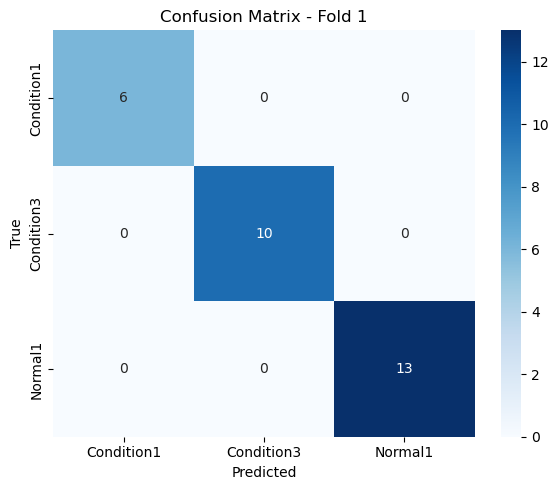

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      1.00      1.00         6
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        13

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Fold 2:
Accuracy: 0.8966
Confusion Matrix:
[[ 5  0  1]
 [ 0 10  0]
 [ 2  0 11]]


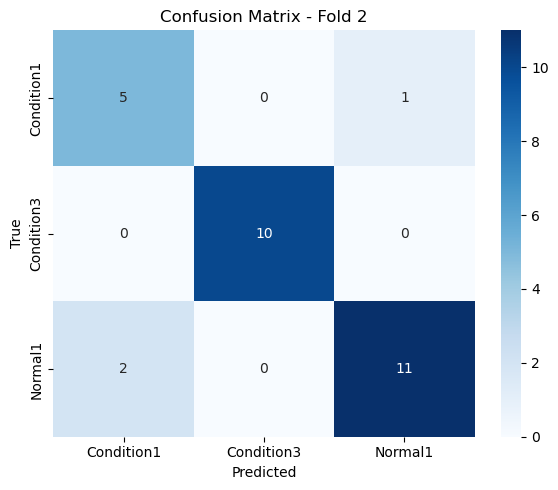

Classification Report:
              precision    recall  f1-score   support

  Condition1       0.71      0.83      0.77         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      0.85      0.88        13

    accuracy                           0.90        29
   macro avg       0.88      0.89      0.88        29
weighted avg       0.90      0.90      0.90        29

Fold 3:
Accuracy: 0.9655
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  0]
 [ 1  0 11]]


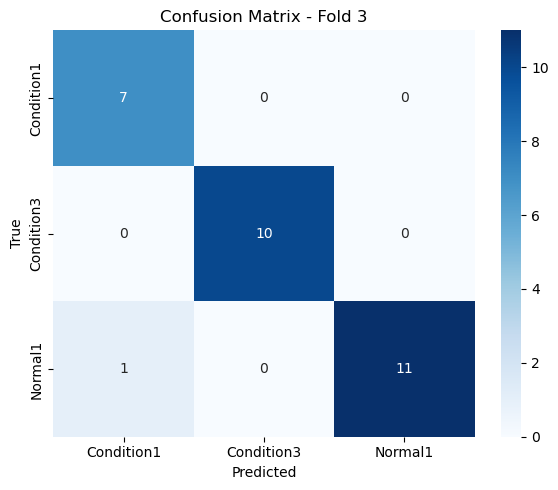

Classification Report:
              precision    recall  f1-score   support

  Condition1       0.88      1.00      0.93         7
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      0.92      0.96        12

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29

Fold 4:
Accuracy: 0.9655
Confusion Matrix:
[[ 6  0  1]
 [ 0 10  0]
 [ 0  0 12]]


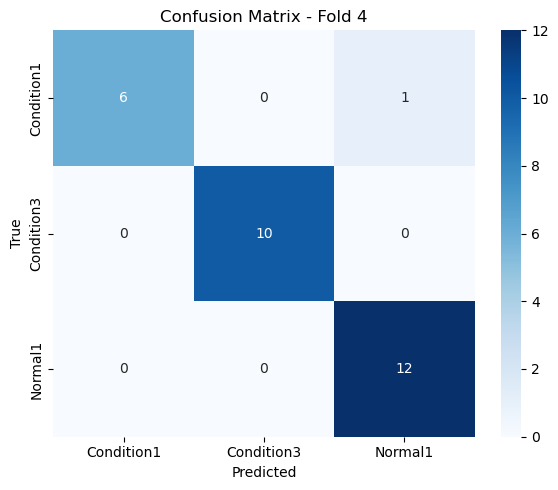

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29

Mean accuracy across all folds: 0.9569


In [161]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the cleaneddata.csv dataset
data = pd.read_csv("cleaneddata.csv")

# Extract the selected features and target variable
X = data[['Cylinder heating zone 1', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Cylinder heating zone 5',
          'Maximum injection pressure', 'Cycle time', 'Switch-over volume', 'Material cushion']]  # Selected features
y = data['Condition']  # Target: 'Condition' column

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the data (important for SVMs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', random_state=0)

# Stratified K-Folds cross-validation (4 folds)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Initialize lists to store results for each fold
accuracy_scores = []
confusion_matrices = []

# Cross-validation loop for training and testing the model
for fold, (train_index, test_index) in enumerate(cv.split(X_scaled, y_encoded), 1):
    # Split the data into training and testing sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the model
    svm_model.fit(X_train, y_train)
    
    # Predict the target for the test set
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy for the fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Print fold results
    print(f"Fold {fold}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean accuracy across all folds: {mean_accuracy:.4f}")


Fold 1:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 4  0  2]
 [ 0 10  0]
 [ 1  0 12]]


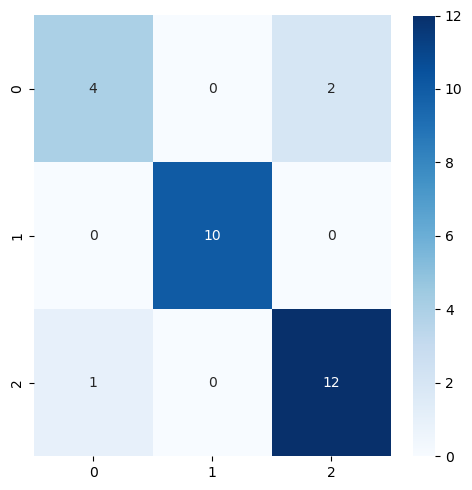

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       1.00      1.00      1.00        10
           2       0.86      0.92      0.89        13

    accuracy                           0.90        29
   macro avg       0.89      0.86      0.87        29
weighted avg       0.89      0.90      0.89        29



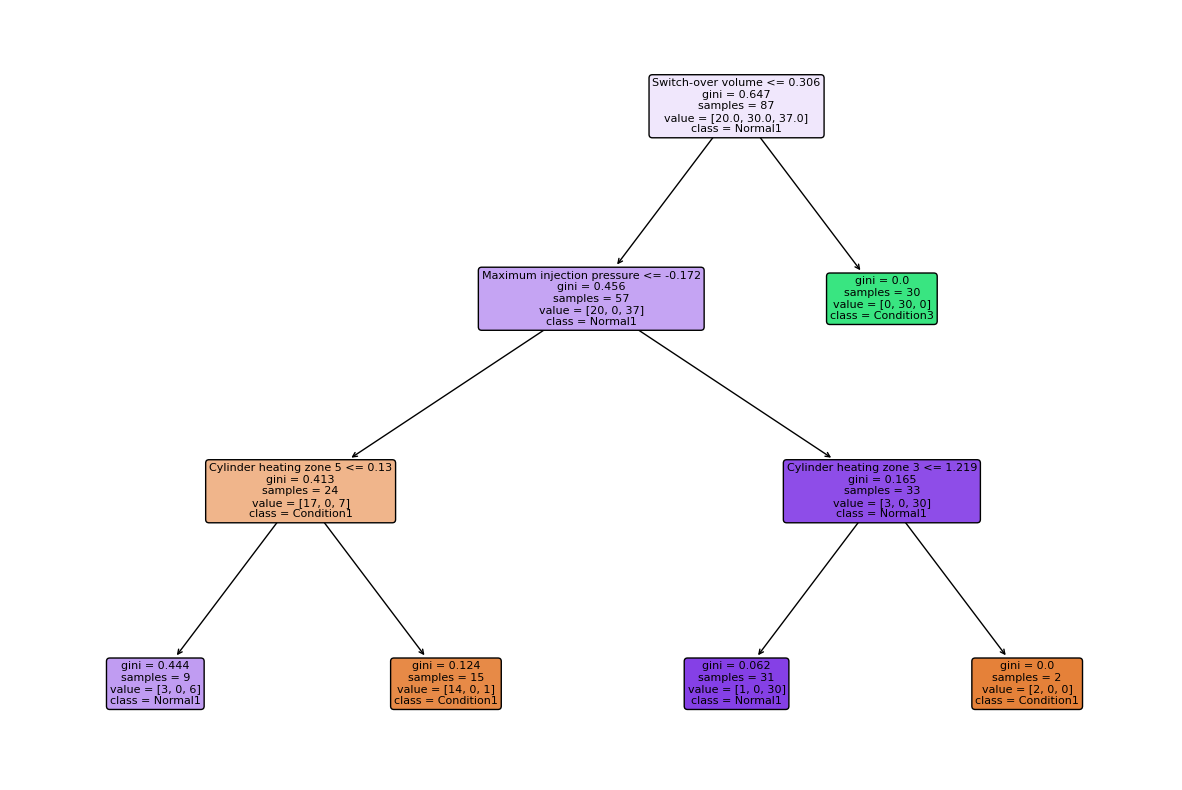

Fold 2:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 3  0  3]
 [ 0 10  0]
 [ 1  0 12]]


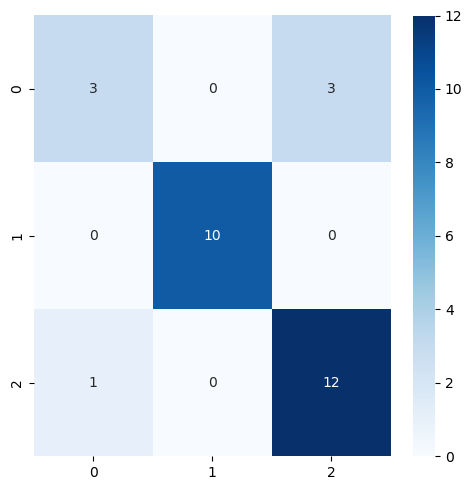

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       1.00      1.00      1.00        10
           2       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



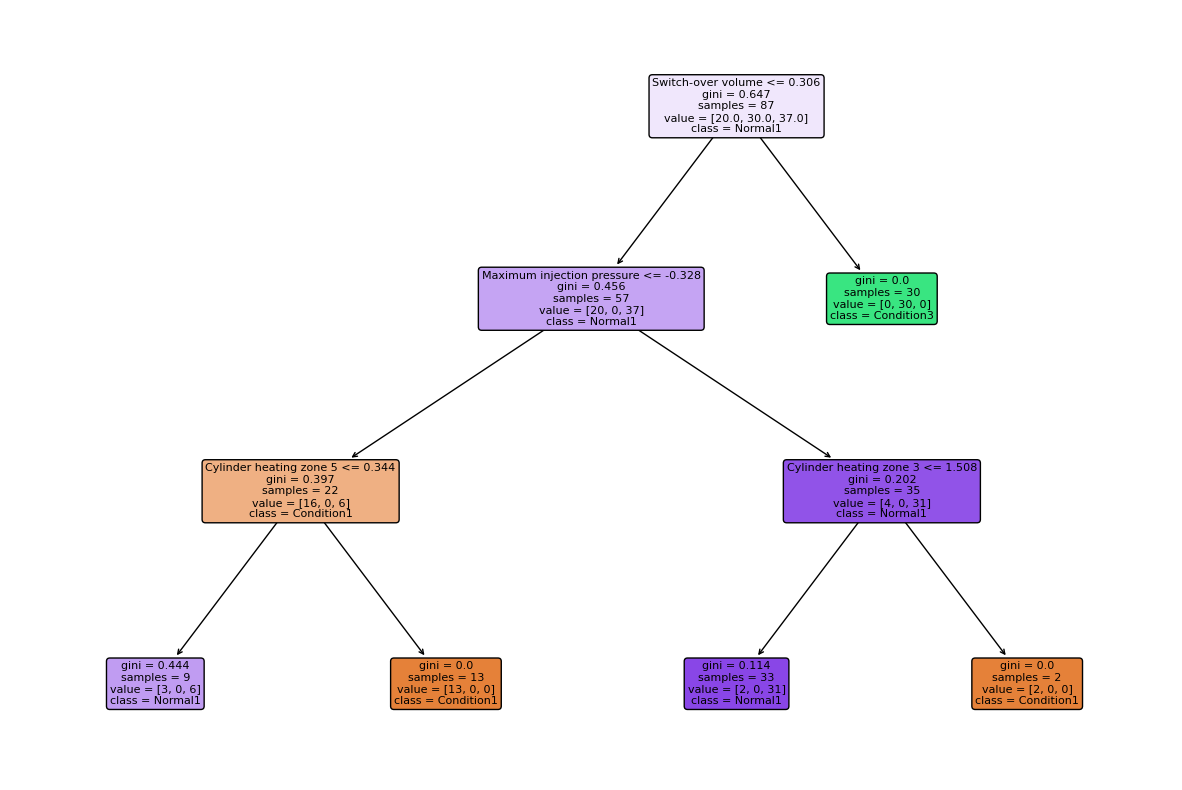

Fold 3:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 3  0  4]
 [ 0 10  0]
 [ 1  0 11]]


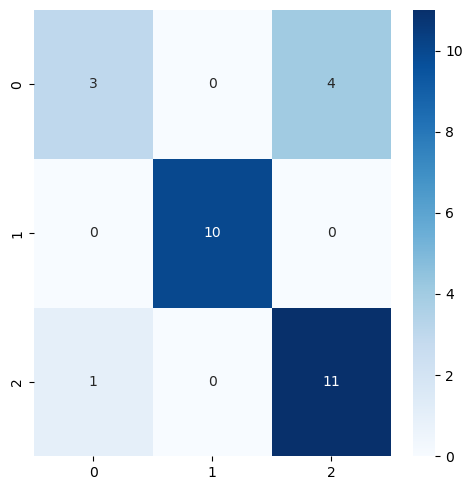

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       1.00      1.00      1.00        10
           2       0.73      0.92      0.81        12

    accuracy                           0.83        29
   macro avg       0.83      0.78      0.79        29
weighted avg       0.83      0.83      0.81        29



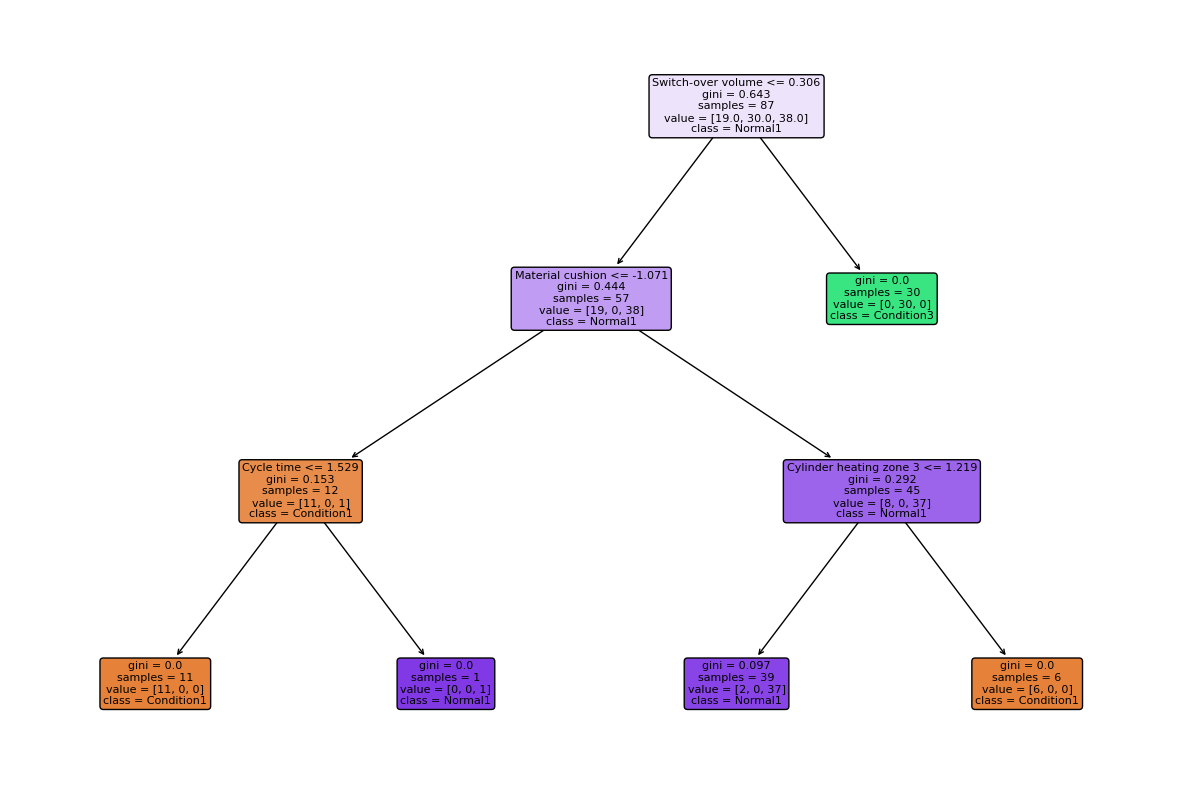

Fold 4:
Training data length: 87
Test data length: 29
Confusion Matrix:
 [[ 3  0  4]
 [ 0 10  0]
 [ 0  0 12]]


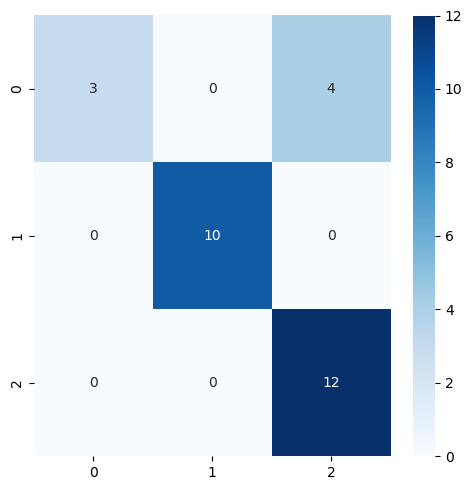

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       1.00      1.00      1.00        10
           2       0.75      1.00      0.86        12

    accuracy                           0.86        29
   macro avg       0.92      0.81      0.82        29
weighted avg       0.90      0.86      0.84        29



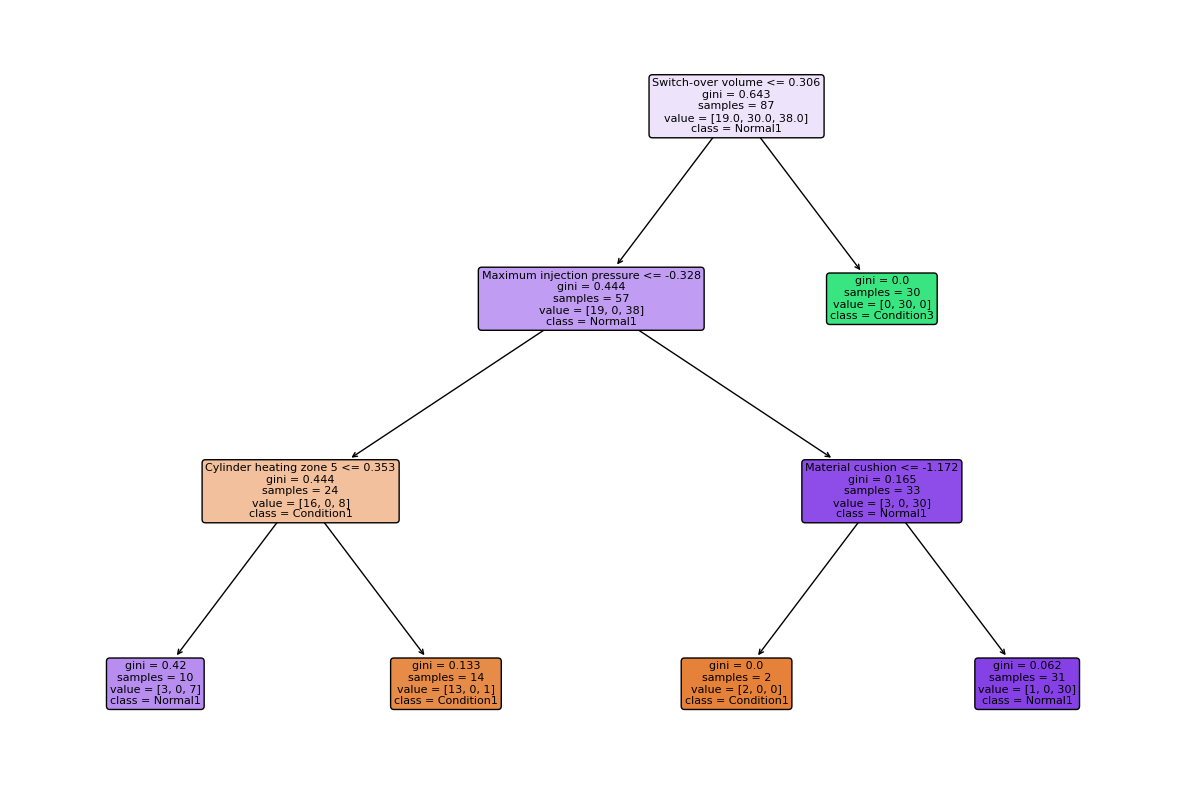

Total training samples across all folds: 348
Total testing samples across all folds: 116
Mean accuracy for Decision Tree: 0.8621
Selected features for Decision Tree: ['Cylinder heating zone 1', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Cylinder heating zone 5', 'Maximum injection pressure', 'Cycle time', 'Switch-over volume', 'Material cushion']


In [167]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score as acs, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the cleaneddata.csv dataset
data = pd.read_csv("cleaneddata.csv")

# Use the specified 8 features and target variable
X = data[['Cylinder heating zone 1', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 
          'Cylinder heating zone 5', 'Maximum injection pressure', 'Cycle time', 
          'Switch-over volume', 'Material cushion']]
y = data['Condition']  # Target: 'Condition' column

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Decision Tree model for training and evaluation
model_tree = DecisionTreeClassifier(random_state=0, max_depth=3)

# Stratified K-Folds cross-validator (4 folds)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Lists to store results
accuracy_tree = []
total_train_samples = 0
total_test_samples = 0

# Cross-validation loop for Decision Tree
for fold, (tr_i, te_i) in enumerate(cv.split(X_scaled, y_encoded), 1):
    # Train and test split
    X_train = X_scaled[tr_i]
    X_test = X_scaled[te_i]
    y_train = y_encoded[tr_i]
    y_test = y_encoded[te_i]
    
    # Update sample counts
    total_train_samples += len(y_train)
    total_test_samples += len(y_test)
    
    print(f"Fold {fold}:")
    print("Training data length:", len(y_train))
    print("Test data length:", len(y_test))
    
    # Fit the Decision Tree model
    model_tree.fit(X_train, y_train)
    
    # Predict for the test set
    y_pred = model_tree.predict(X_test)
    
    # Calculate accuracy
    accuracy = acs(y_test, y_pred)
    accuracy_tree.append(accuracy)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    
    # Plot confusion matrix as heatmap
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot the decision tree structure
    plt.figure(figsize=(15, 10))
    condition_labels = le.inverse_transform(model_tree.classes_)
    plot_tree(model_tree, feature_names=X.columns, class_names=condition_labels, 
              filled=True, rounded=True, fontsize=8)
    plt.show()

# Total training and testing samples
print(f"Total training samples across all folds: {total_train_samples}")
print(f"Total testing samples across all folds: {total_test_samples}")

# Mean accuracy for Decision Tree
print("Mean accuracy for Decision Tree: {:.4f}".format(np.mean(accuracy_tree)))

# Print selected features
print("Selected features for Decision Tree:", X.columns.tolist())


Best Hyperparameters: {'kernel': 'linear', 'gamma': 'auto', 'degree': 3, 'C': 1}
Fold 1:
Accuracy: 0.9310
Confusion Matrix:
[[ 4  0  2]
 [ 0 10  0]
 [ 0  0 13]]


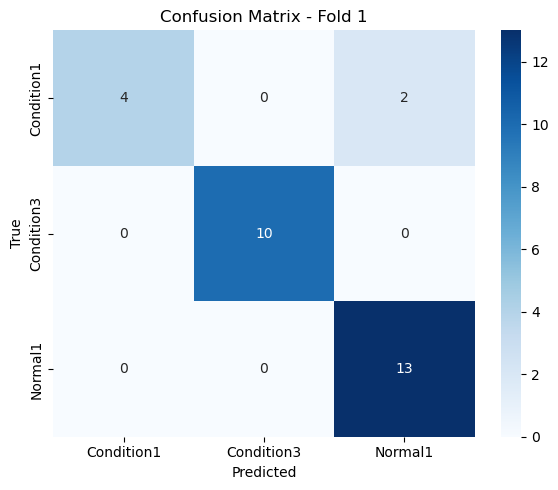

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.67      0.80         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.87      1.00      0.93        13

    accuracy                           0.93        29
   macro avg       0.96      0.89      0.91        29
weighted avg       0.94      0.93      0.93        29

Fold 2:
Accuracy: 0.9655
Confusion Matrix:
[[ 6  0  0]
 [ 0 10  0]
 [ 1  0 12]]


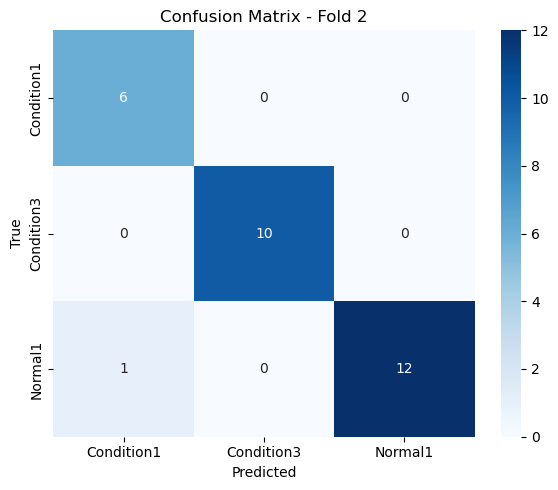

Classification Report:
              precision    recall  f1-score   support

  Condition1       0.86      1.00      0.92         6
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      0.92      0.96        13

    accuracy                           0.97        29
   macro avg       0.95      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29

Fold 3:
Accuracy: 1.0000
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  0]
 [ 0  0 12]]


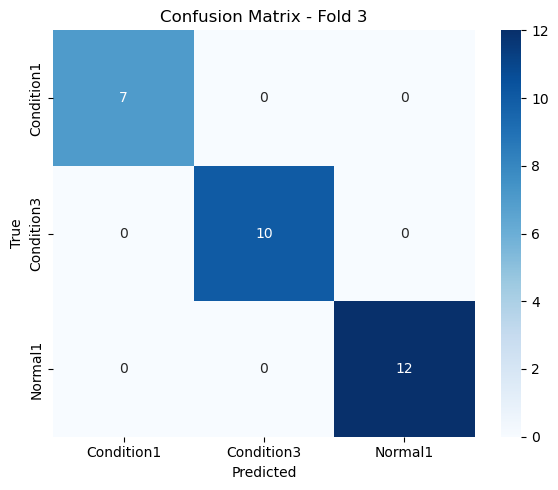

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      1.00      1.00         7
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Fold 4:
Accuracy: 0.9655
Confusion Matrix:
[[ 6  0  1]
 [ 0 10  0]
 [ 0  0 12]]


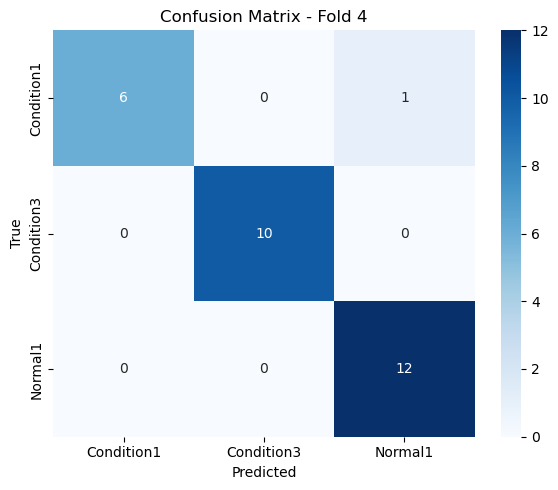

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29

Mean accuracy across all folds: 0.9655


In [179]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the cleaneddata.csv dataset
data = pd.read_csv("cleaneddata.csv")

# Extract all features and target variable
X = data[['Cylinder heating zone 1', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Cylinder heating zone 5',
          'Maximum injection pressure', 'Cycle time', 'Switch-over volume', 'Material cushion']]  # Selected features
y = data['Condition']  # Target: 'Condition' column

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the data (important for SVMs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SVM model (Linear and RBF SVM)
svm_model = SVC(random_state=42)

# Step 1: Define hyperparameter distributions for RandomizedSearchCV
param_dist = {
    'C': [0.1, 1, 10],  # Adjusted C range for smaller datasets
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Linear and RBF, poly,sigmoid kernels
        'degree': [3, 4, 5, 6, 7],  # Ensure integer values for degree
        'gamma': ['scale', 'auto']  # Gamma options for RBF kernel
}

# Step 2: Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Step 3: RandomizedSearchCV setup
random_search = RandomizedSearchCV(svm_model, param_dist, n_iter=20, cv=cv, random_state=42, n_jobs=-1)

# Step 4: Fit RandomizedSearchCV
random_search.fit(X_scaled, y_encoded)

# Best hyperparameters from RandomizedSearchCV
print(f"Best Hyperparameters: {random_search.best_params_}")

# Step 5: Evaluate the best model found by RandomizedSearchCV
best_model = random_search.best_estimator_

# Cross-validation loop for training and testing the model with the best hyperparameters
accuracy_scores = []
confusion_matrices = []

for fold, (train_index, test_index) in enumerate(cv.split(X_scaled, y_encoded), 1):
    # Split the data into training and testing sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the best model
    best_model.fit(X_train, y_train)
    
    # Predict the target for the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy for the fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Print fold results
    print(f"Fold {fold}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean accuracy across all folds: {mean_accuracy:.4f}")


Selected Important Features: ['Cylinder heating zone 1' 'Cylinder heating zone 3'
 'Cylinder heating zone 4' 'Cylinder heating zone 5'
 'Maximum injection pressure' 'Cycle time' 'Switch-over volume'
 'Material cushion']
Fold 1:
Number of training samples: 87
Number of testing samples: 29
Accuracy: 0.9310
Confusion Matrix:
[[ 4  0  2]
 [ 0 10  0]
 [ 0  0 13]]


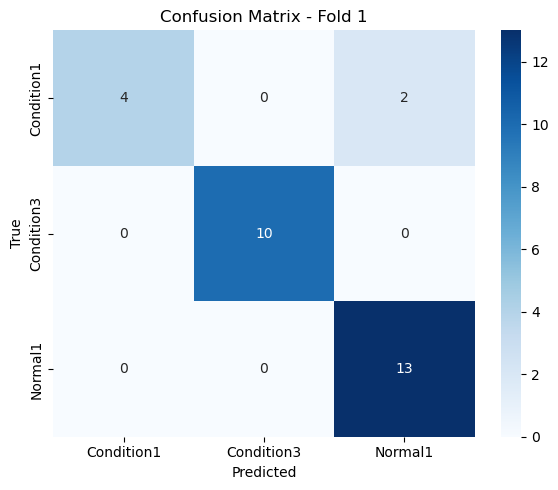

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.67      0.80         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.87      1.00      0.93        13

    accuracy                           0.93        29
   macro avg       0.96      0.89      0.91        29
weighted avg       0.94      0.93      0.93        29

Fold 2:
Number of training samples: 87
Number of testing samples: 29
Accuracy: 0.9655
Confusion Matrix:
[[ 6  0  0]
 [ 0 10  0]
 [ 1  0 12]]


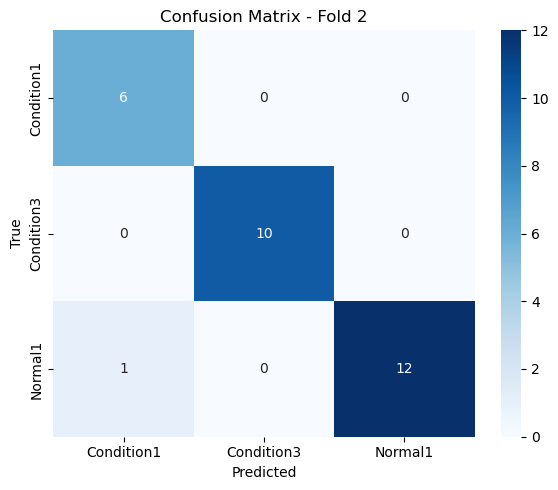

Classification Report:
              precision    recall  f1-score   support

  Condition1       0.86      1.00      0.92         6
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      0.92      0.96        13

    accuracy                           0.97        29
   macro avg       0.95      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29

Fold 3:
Number of training samples: 87
Number of testing samples: 29
Accuracy: 1.0000
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  0]
 [ 0  0 12]]


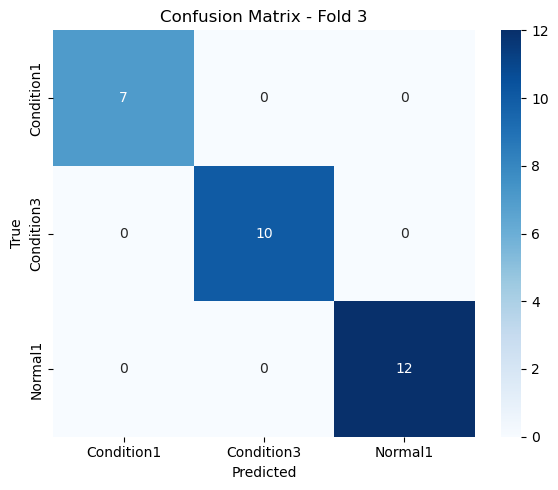

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      1.00      1.00         7
  Condition3       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

Fold 4:
Number of training samples: 87
Number of testing samples: 29
Accuracy: 0.9655
Confusion Matrix:
[[ 6  0  1]
 [ 0 10  0]
 [ 0  0 12]]


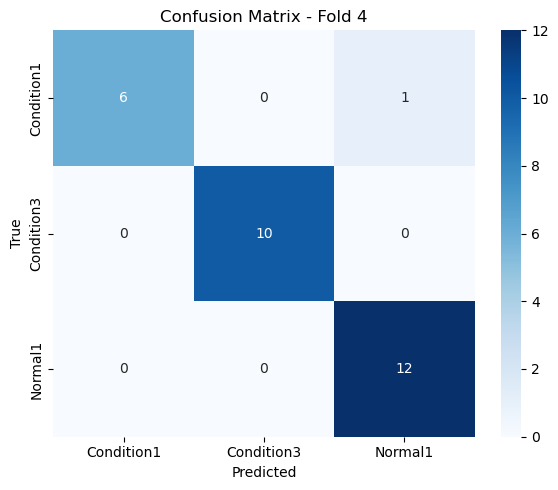

Classification Report:
              precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29

Mean accuracy across all folds: 0.9655


In [189]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the cleaneddata.csv dataset
data = pd.read_csv("cleaneddata.csv")

# Extract all features and target variable
X = data[['Cylinder heating zone 1', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Cylinder heating zone 5',
          'Maximum injection pressure', 'Cycle time', 'Switch-over volume', 'Material cushion']]  # Selected features
y = data['Condition']  # Target: 'Condition' column

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the data (important for SVMs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Use RFE to select the best features
svm_model = SVC(kernel='linear', gamma='auto', C=1, degree=3, random_state=42)
selector = RFE(svm_model, n_features_to_select=8)  # Selecting all 8 important features
X_selected = selector.fit_transform(X_scaled, y_encoded)

# Get the selected features' names
selected_features = np.array(X.columns)[selector.support_]
print(f"Selected Important Features: {selected_features}")

# Define StratifiedKFold (4 folds)
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)

# Initialize lists to store results for each fold
accuracy_scores = []
confusion_matrices = []

# Cross-validation loop for training and testing the model with the best hyperparameters
for fold, (train_index, test_index) in enumerate(cv.split(X_selected, y_encoded), 1):
    # Split the data into training and testing sets
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Print the number of training and testing samples
    print(f"Fold {fold}:")
    print(f"Number of training samples: {len(X_train)}")
    print(f"Number of testing samples: {len(X_test)}")
    
    # Train the SVM model with the best hyperparameters
    svm_model.fit(X_train, y_train)
    
    # Predict the target for the test set
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy for the fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Print fold results
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean accuracy across all folds: {mean_accuracy:.4f}")
